# Riot API 

This analysis isn't endorsed by Riot Games and doesn't reflect the views or opinions of Riot Games or anyone officially involved in producing or managing Riot Games properties. Riot Games, and all associated properties are trademarks or registered trademarks of Riot Games, Inc.

REMINDER: API changes every couple of days, each hash changes along with it!

## To Do

1. (Current) Code experimentation
2. Running Collection for Dataset
3. Preparing Analysis

Priority
* Scheduling running of the collection code

* SQL Alchemy 
    * Check if tables exist, if not then create the tables
    * Duplicate handling
    * Logging just to see what's happening
    * https://docs.sqlalchemy.org/en/14/core/engines.html#dbengine-logging
    * Sessions/Transactions?
        * https://www.michaelcho.me/article/sqlalchemy-commit-flush-expire-refresh-merge-whats-the-difference
        * https://docs.sqlalchemy.org/en/14/orm/session_basics.html#session-faq-whentocreate

* Environment Preparation (Isolating just the necessary libraries to run this code
    * Is there a Better way of showing the needed libaries?

* Workflow for analysis
    * Generic
        * Match ID
            * Username
                * Ranking
    * Targeted
        * Username
           * Match information of previous matches

## Goal

Showcase DataScience with limited Data

## Plan

1. API ingestion into clear columns
1. Database Setup
    1. Users (puuid, summonerid, username)
    1. Ranking Table (summoner revision date, rank, title, lp)
1. Database insertion of data
    1. How to cache this data for the future
1. Explaining more about Team Fight Tactics


## Ideas:
* 

## Links
* https://developer.riotgames.com/apis

* https://requests.readthedocs.io/en/latest/user/quickstart/


## Lessons Learned
* Python Requests .json() returns a dict that can be encoded to JSON (AKA deserialization) requires serialization to turn into proper JSON. Difference is that the deserialization creates a dictionary that uses single quotes. However JSON requires double quotes for strings! Can use json library function dumps to serialize, or just replace single quotations with double quotations. 

* SQL Alchemy 
    * Object Oriented Programming
    * Sessions and transactions for logging purposes
    * Mostly flexible backend. There are some backend specific functions that is not universal

* Github
    * Hiding API keys through gitignore

* Rate Limiting
    * Decorator Factories (Merging Decorators)
    
* Decision on Class Creation
    * Not everything deserves to be a class
    * In my own words: "Classes are best used as interfaces where interactivity of an object is the main goal"
    * For this project the data is just being pipelined to another part, theres no altering of a single object, they're being turned into a different object
    
    
    

# Classes 
classes for more structured code? Probably best for showcasing and the API Limter decorator
For best usage Requires more than 1 method....


objects & methods
* user
    * username
    * PUUID
    


* match

* user ranking information




* Requests from the API
    * Request "account info" given username
    * Request ranking information given summoner id (https://developer.riotgames.com/apis#tft-summoner-v1)
    * Request ranking information given rank and placement (https://developer.riotgames.com/apis#tft-league-v1)
        * Top 100 Challenger
        * Top 200 GM
        * Top 100 Master
        * Per Rank and Placement (Diamond-Bronze)
    * Request Match IDs given puuid and n latest matches
    * Request Match Information given Match IDs
    
* Inserts to the Database
    * Basically One For each table 

Questions:
* How do classes interact with each other, especially with piping methods into and out of different classes? 
* Are there other reused classes like user and match? (Maybe within the breakdown of the data from API to Database



Classes Relative to use-case
Use Case Scenario 1: Creating a database for analysis and ML Modeling
Steps
1. Query for a specific subset of users based on REGION and RANK
1. Store Match information (Duplicate Match IDs should be checked and skipped for optimization)
1. Store Ranking information (difficult, rank over time is not stored. Best way would be to query that data seperately every 30 mins) [Push to Next Version]


Use Case Scenario 2: Looking up users within my match
1. Query for match history based on manually inputted usernames
1. Store Match Database for Analysis
1. Run analysis ("this person's top 3 comps are ... and have ... TOP 4%. )"
1. Utilize "ML model" for prediction


# Overview

## Objective

## ETL Process
1. EXTRACT - API Configuration
1. TRANSFORM - Data Munging Userprofiles and TFT Matches 
1. LOAD - SQLAlchemy Insertion into Storage Database

## Data Analysis and Modeling
1. Comparisons per Rank and Region
    * Hypothesis
        * As Rank increases, competition becomes tighter
        * Different regions have noticably different playstyles/metas
    
    * Hypothetical Root Causes:
        * Rank - Higher rank will show less gold remaining when Health reaches 0
        * Rank - Higher rank will show shorter stages of the game
    
    * Hypothetical Solutions:
1. "What makes BOT4?" 
    * Hypothesis: Inaccurate player understanding of their comp powerlevel relative to other players
        * Playing too greedy when actually terminally weak
    * Hypothetical Root Causes:
        * 
    * Hypothetical Solutions:
        * Access damage dealt is above "some threshold" by "some stage in the game"

1. "What is the optimal setup for comps?"
    * Example: For Sharpshooters how much higher is the average placement for Teemo Chosen vs Vayne Chosen
1. Conditional Matches
    * If a match was close what are "good enough" comps
    * If contested, which comps do better
 
## Implementation for Competitive Usage
1. Basic analytics per User output, expose one-trick players
1. Suggest counter comps


## Summary

---

# ETL 

In [1]:
# https://pypi.org/project/ratelimit/
from ratelimit import limits, sleep_and_retry

In [2]:
# Decorator factory to merge the decorators together!
def API_CALL_LIMIT():
    
    #https://developer.riotgames.com/
    #Rate Limits
    # HIGHEST BOUND: 50 per min
    # 20 requests every 1 seconds(s)
    requests = 20
    #rate_limit = 1
    rate_limit = 2
    #100 requests every 2 minutes(s)
    requests_2 = 100
    #rate_limit_2 = 120
    rate_limit_2 = 180
    deco2 = limits(calls=requests, period=rate_limit)
    deco1 = limits(calls=requests_2, period=rate_limit_2)

    def combined_decorator(func):
        return sleep_and_retry(deco2(deco1(func)))

    return combined_decorator

In [3]:
# Libraries
import requests

import pprint
pp = pprint.PrettyPrinter(depth=8)

import time

import sqlalchemy as db

# how to connect to local? I think I need a driver to do so
# https://www.youtube.com/watch?v=qfYzCdkVwig
# pip installed pymysql
# https://towardsdatascience.com/sqlalchemy-python-tutorial-79a577141a91

import pymysql
# import json # Requests already converts JSON into dict

In [14]:
# Api Key Needs to be changed every couple of days!!!!
    #api_key = "EXAMPLE-NUMBERS-LETTERS-UPPERCASE-LOWERCASE"
# Header for API queries

# https://www.tutorialexample.com/jupyter-notebook-run-python-script-py-file-and-command-line-a-simple-guide/
%run config.py

# Database Setup
Setup for Local mysqldb server

In [5]:
engine = db.create_engine("mysql+pymysql://root@localhost/TFT", echo = False) #Set echo to False to hide outputs
conn = engine.connect()

## SQLALCHEMY Referencing Tables

In [6]:
meta = db.MetaData()
# engine.execute("CREATE TABLE items (item_id int, item_name varchar(255))")
items = db.Table(
    'items', meta, 
    db.Column('item_id', db.Integer, primary_key = True, autoincrement = False), 
    db.Column('item_name', db.String(255))
)
#engine.execute("CREATE TABLE match_id (match_id int, game_datetime datetime, game_length int, game_version varchar(255))")
match_id = db.Table(
    'match_id', meta,
    db.Column('match_id',  db.String(255), primary_key = True, autoincrement = False),
    db.Column('game_datetime', db.BigInteger),
    db.Column('game_length', db.Float),
    db.Column('game_version', db.String(255)),
    db.UniqueConstraint('match_id')
)

#engine.execute("CREATE TABLE match_info (match_id int, puuid varchar(255), placement int, level int, "
#                                       "time_eliminated int, last_round int, gold_left int, total_damage_to_players int,"
#                                        "traits varchar(255), chosen_info varchar(255), units varchar(255))")


match_info = db.Table(
    'match_info', meta,
    db.Column('match_id',  db.String(255), autoincrement = False),
    db.Column('puuid', db.String(255)),
    db.Column('placement', db.Integer, autoincrement = False),
    db.Column('level', db.Integer, autoincrement = False),
    db.Column('time_eliminated', db.Integer, autoincrement = False),
    db.Column('last_round', db.Integer, autoincrement = False),
    db.Column('gold_left', db.Integer, autoincrement = False),
    db.Column('total_damage_to_players', db.Integer, autoincrement = False),
    db.Column('traits', db.String(255)),
    db.Column('chosen_info', db.String(255)),
    db.Column('units', db.Text)
)

#engine.execute("CREATE TABLE user_info (puuid varchar(255), summoner_id varchar(255), summoner_username varchar(255))")
user_info = db.Table(
    'user_info', meta,
    db.Column('puuid', db.String(255), index=True),
    db.Column('summoner_id', db.String(255), index=True),
    db.Column('summoner_username', db.String(255)),
    db.UniqueConstraint('puuid'),
    db.UniqueConstraint('summoner_id'),
    db.UniqueConstraint('summoner_username')
)

#engine.execute("CREATE TABLE user_rank (summoner_id varchar(255), tier varchar(255), rank varchar(255), league_points int, revision_date datetime)")
user_rank = db.Table(
    'user_rank', meta,
    db.Column('summoner_id', db.String(255), index=True),
    db.Column('time_searched', db.BigInteger),
    db.Column('tier', db.String(5)),
    db.Column('rank', db.String(10)),
    db.Column('league_points', db.Integer),
    db.Column('wins', db.Integer),
    db.Column('losses', db.Integer),
    db.Column('fresh_blood', db.Boolean),
    db.Column('hot_streak', db.Boolean),
    db.Column('veteran', db.Boolean),
    db.Column('inactive', db.Boolean)
)

## Creating the Tables
First-time creation

In [6]:
meta.create_all(engine)

## Testing SQL Functionality

### Inserting

In [ ]:
# https://docs.sqlalchemy.org/en/14/core/dml.html
# Inserting
# if one of them is already found, then all of it wont work
def insert_test1():
    try:
        conn.execute(user_rank.insert(), [
            {'summoner_id': 'A', 
             'time_searched':1608683566.2611852,
             'tier':'PLATINUM',
             'rank':'I',
             'league_points':1000,
             'wins':1000,
             'losses':1,
             'fresh_blood':False,
             'hot_streak':False,
             'veteran':False,
             'inactive':False
            }
         ])
    except db.exc.IntegrityError:
        print("An IntegrityError exception occurred. Already in Database") 

    


In [ ]:
def insert_test2():
    try:
        conn.execute(user_info.insert(), [
            {
            'puuid': None, #Python None = SQL NULL
            'summoner_id':1,
            'summoner_username':'TEST',
            }
         ])
    except db.exc.IntegrityError:
        print("An IntegrityError exception occurred. Already in Database") 


### Selecting

In [ ]:
# https://towardsdatascience.com/sqlalchemy-python-tutorial-79a577141a91
def select_test1():
    query = db.select([user_info.columns.summoner_id]).where(user_info.c.puuid == None)
    Result = conn.execute(query)
    
    for row in Result:
        print(row.values()[0])
        print(type(row.values()[0]))

In [ ]:
#select_test1()

### Updating

In [ ]:
def update_test1():
    query = db.update(user_info).where(user_info.c.summoner_id == "1").values({"puuid":"TESTpuuid"})
    Result = conn.execute(query)
    
#     for row in Result:
#         print(row.values()[0])
#         print(type(row.values()[0]))

In [ ]:
#update_test1()

In [13]:
# API response dictionary (human readable errors)
API_Responses = {
    200: "OK",
    400: "Bad request",
    401: "Unauthorized",
    403: "Forbidden",
    404: "Data not found",
    405: "Method not allowed",
    415: "Unsupported media type",
    429: "Rate limit exceeded",
    500: "Internal server error",
    502: "Bad gateway",
    503: "Service unavailable",
    504: "Gateway timeout"
}
# TODO Create error handling depending on API response


In [15]:
# LOOP I: Iterate through each PAGE
@API_CALL_LIMIT()
def search_rank(rank, tier, page):
    """
    Output a list of dicts, where each list item is a user with a dict of profile values
    """
    search_rank = "https://na1.api.riotgames.com/tft/league/v1/entries/{}/{}?page={}".format(rank, tier, page)
    response_search_rank = requests.get(search_rank, headers=headers)
    if API_Responses[response_search_rank.status_code] == "OK":
        return response_search_rank.json()
    else:
        return "ERROR"
    

In [16]:

page = 1
rank = "DIAMOND" # PLATINUM, GOLD, SLIVER, BRONZE, IRON
tier = "I" # I, II, III, IV
time_searched = time.time()

def create_search_rank_pages(page, rank, tier):
    search_rank_pages = {}
    while True:
        #print(page) #try-catch-else?
        page_info = search_rank(rank, tier, page)
        # Error handling
        if page_info == "ERROR":
            print("Connection Issue")
            break
        elif page_info == []:
            print("Total Pages: {}".format(page-1))
            break
        else:
            search_rank_pages[page] = page_info
            page += 1
    return search_rank_pages

In [ ]:
search_rank_pages = create_search_rank_pages(page, rank, tier)

In [17]:
def insert_user_rank_and_user_info(page, rank, tier, time_searched, search_rank_pages):
    page_number = 1
    count = 1
    for pages in search_rank_pages:
        for user in search_rank_pages[pages]:
            summoner_id = user['summonerId']
            summoner_name = user['summonerName']
            #league_id = user['leagueId']

            league_points = user['leaguePoints']
            tier = tier
            rank = rank
            wins = user['wins']
            losses = user['losses']
            fresh_blood = user['freshBlood']
            hot_streak = user['hotStreak']
            veteran = user['veteran']
            inactive = user['inactive']


    #         count +=1
    #         print("{},{},{}".format(summoner_id,summoner_name,league_id))
    #         print("{},{},{}".format(tier,rank,league_points))
    #         print("{},{},{},{},{},{}".format(wins,losses,fresh_blood,hot_streak,veteran,inactive))
    #         print(page_number)
    #         print(userpage)
    #         print(len(search_rank_pages[page_number]))
    #         print(userpage)
            try:
                conn.execute(user_rank.insert(), [
                    {
                    'summoner_id': summoner_id, 
                    'time_searched':time_searched,
                    'tier':tier,
                    'rank':rank,
                    'league_points':league_points,
                    'wins':wins,
                    'losses':losses,
                    'fresh_blood':fresh_blood,
                    'hot_streak':hot_streak,
                    'veteran':veteran,
                    'inactive':inactive
                    }
                 ])
            except db.exc.IntegrityError:
                print("An IntegrityError exception occurred. Already in user_rank Database")

            try:
                conn.execute(user_info.insert(), [
                    {
                    'puuid': None, 
                    'summoner_id':summoner_id,
                    'summoner_username':summoner_name,
                    }
                 ])
            except db.exc.IntegrityError:
                print("An IntegrityError exception occurred. Already in user_info Database") 


        page_number += 1
    #   print(page_number)

    # print(count)

In [ ]:
insert_user_rank_and_user_info(page, rank, tier, time_searched, search_rank_pages)

In [18]:
@API_CALL_LIMIT()
def search_puuid(summoner_id):
    """
    Output a dict where each item is a user profile value
    """
    search_puuid = "https://na1.api.riotgames.com/tft/summoner/v1/summoners/{}".format(summoner_id)
    response_search_puuid = requests.get(search_puuid, headers=headers)
    if API_Responses[response_search_puuid.status_code] == "OK":
        return response_search_puuid.json()
    else:
        return "ERROR"


In [19]:
def update_puuid():
    """
    Update user_info database with puuids based on their summoner_id
    
    """
    # Select summonerIDs that do not have puuids
    query = db.select([user_info.columns.summoner_id]).where(user_info.c.puuid == None)
    Result = conn.execute(query)
   
    if Result == None:
        print("All puuids updated!")
        pass
    else:
        print("Updating puuids")
        #print(Result)
        for row in Result:
            #print(row.values()[0])
            #print(type(row.values()[0]))
            
            summoner_id = row.values()[0]
            # Query profile info using summonerID
            user_profile_info = search_puuid(summoner_id)

            puuid = user_profile_info['puuid']
            
            # Insert puuid into user data DB
            # Error handling
            if user_profile_info == "ERROR":
                print("Connection Issue")
                break
            else:
                try:
                    conn.execute(db.update(user_info).where(user_info.c.summoner_id == summoner_id).values({"puuid":puuid}))
                except db.exc.IntegrityError:
                     print("An IntegrityError exception occurred. Already in user_info Database") 

        

In [ ]:
update_puuid()

In [ ]:
# Search_by_ranking
# LOOP I: Iterate through each PAGE
    # Get Time in epoch - For match game datetime
# LOOP II: Iterate through each USER
    # Breakdown the ranking per person
    # Insert into user data DB (Name, summonerID, puuid(NULL), leagueId)
    # Insert into rank data DB (tier, rank, lp, wins, losses, veteran)

# One-time use since puuid/summonerid are used for identification
# Search_by_puuid
    # From Search_by_ranking, Select username
    # Search by summonerID LINK: https://developer.riotgames.com/apis#tft-summoner-v1/GET_getBySummonerId
    # Get puuid
    # insert puuid into user data DB (Name, summonerID, puuid, leagueId)

# [1 query] Get TIER and Rank of page 1 
# JSON -> List of names () [n = total length of name list]
# [n queries] List of names -> last 20 matches list
# last 20 matches list -> remove duplicates [m = total length of match list]
# [n+m queries] for each match look up match information
# break down match information




In [20]:
@API_CALL_LIMIT()
def search_matchlist(puuid,n_recent_matches):
    """
    """
    search_match = "https://americas.api.riotgames.com/tft/match/v1/matches/by-puuid/" + puuid + "/ids?count="+ str(n_recent_matches)
    response_search_match = requests.get(search_match, headers=headers)
    if API_Responses[response_search_match.status_code] == "OK":
        
        return response_search_match.json()
    else:
        return "ERROR"


In [21]:
def create_match_id_list():
    # Select puuids
    # Is there a way to make this .where part of the function argument?
    query = db.select([user_info.columns.puuid]).where(user_info.c.puuid != None)
    #query = db.select([user_info.columns.puuid]).where(user_info.c.puuid.like("-%"))
    #query = db.select([user_info.columns.puuid]).where(user_info.c.puuid == '-1mu6KrTnZ0sT0pRIN8IgPwpepQkS58G92y3PMlODEMZ3VujZulhncyw6jT2qbiD333-qzVDikUhNg')
    #query = db.select([user_info.columns.puuid]).where(user_info.c.puuid == '-4BI5FpY_Ttt0wCgemKnVxb5Se3c431kmLTuYxwAJU1TOmxDCGgkFPJ__mHbdSetFEmEoi050ujUHg')

    Result = conn.execute(query)
    main_match_list = []
    for row in Result:
        #print(row.values()[0])
        #print(main_match_list)
        puuid = row.values()[0]
        # Query match ids using puuid
        
        #Is there a way to make this 1 (last game) part of the function argument?
        match_list = search_matchlist(puuid, 1)
        if match_list == "ERROR":
            break
        main_match_list = list(set().union(main_match_list, match_list))
    return main_match_list

In [ ]:
main_match_list = create_match_id_list()

In [22]:
def insert_match_id(main_match_list):
    for match_id_item in main_match_list:
        try:
            conn.execute(match_id.insert(), [
                {
                'match_id': match_id_item, 
                'game_datetime':None,
                'game_length':None,  
                'game_version':None  
                }
             ])
        except db.exc.IntegrityError:
            print("An IntegrityError exception occurred. Already in user_info Database") 

In [ ]:
insert_match_id(main_match_list)

In [ ]:
### Match ID

In [23]:
@API_CALL_LIMIT()
def search_match_info(match_id):
    """
    """
    search_match_info = "https://americas.api.riotgames.com/tft/match/v1/matches/{}".format(match_id)
    response_search_match_info = requests.get(search_match_info, headers=headers)
    if API_Responses[response_search_match_info.status_code] == "OK":
        
        return response_search_match_info.json()
    else:
        "ERROR"
        #return API_Responses[response_search_match_info.status_code]

In [ ]:
x = search_match_info('NA1_3670606675')

In [ ]:
x

In [24]:
def trait_clean(trait_dict):
    trait_tier = dict()
    for trait in trait_dict:
        trait_tier[trait['name'].replace('Set4_',"")] =  trait['tier_current']
    trait_tier_sorted = sorted(trait_tier.items(),  key=lambda x:x[1], reverse=True)
    trait_tier_clean = dict(filter(lambda num: num[1] !=0, trait_tier_sorted))
    return trait_tier_clean

In [25]:
itemization_dict = {
    0: "Not Itemized",
    1: "Partially Itemized",
    2: "Semi Itemized",
    3: "Fully Itemized"
    
}

In [26]:
def chosen_clean(unit_list):
    #One method, Go through the list and then through each dict item.
    chosen_check = False
    chosen_info = ""
    for i in unit_list:
        if 'chosen' in i:
            #print(1)
            #print(i['character_id'])
            #print(i['tier'])
            
            chosen_check = True
            chosen_info += i['chosen'] + " "
            chosen_info +=i['character_id'] + " "
            if i['tier'] > 2:
                chosen_info += "Upgraded" + " "
            #print(i['items'])
            chosen_info += itemization_dict[len(i['items'])]

            
    
    if chosen_check:
        return(chosen_info)
    else:
        return("NO CHOSEN")

In [ ]:
query = db.select([match_id.columns.match_id]).where(match_id.c.game_version == None)

Result = conn.execute(query)

In [ ]:
 for row in Result:
        print(row.values()[0])

In [27]:
def insert_match_information():
    # Select puuids
    query = db.select([match_id.columns.match_id]).where(match_id.c.game_version == None)
    
    Result = conn.execute(query)
   
    for row in Result:
        match_id_item = row.values()[0]
        match_information = search_match_info(match_id_item)
        
        if match_information == "ERROR":
            print("BREAKING")
            break
        elif match_information == None:
            continue
        else:
            # Parse dict for match_id DB
            match_id_item = row.values()[0]
            print(match_id_item)
            
            print(match_information)
            game_datetime = match_information['info']['game_datetime']
            game_length = match_information['info']['game_length']
            game_version = match_information['info']['game_version']
            print(game_datetime)


            #Update match_id DB
            try:
                conn.execute(match_id.update().where(match_id.c.match_id == match_id_item), [
                    { 
                        'game_datetime':game_datetime,
                        'game_length':game_length,  
                        'game_version':game_version  
                    }
                 ])
            except db.exc.IntegrityError:
                print("An IntegrityError exception occurred. Already in user_info Database") 

            # Parse dict for match_info DB
            for i,x in enumerate(match_information['info']['participants']):
                #print(i)
                #print(x)
                gold_left = x['gold_left']
                last_round = x['last_round']
                level = x['level']
                placement = x['placement']
                players_eliminated = x['players_eliminated']
                puuid = x['puuid']
                time_eliminated = x['time_eliminated']
                total_damage_to_players = x['total_damage_to_players']
                traits = trait_clean(x['traits'])
                units = sorted(x['units'], key=lambda k: len(k['items']), reverse=True)
                chosen_info = chosen_clean(units)

                #Update match_info DB
                try:
                    conn.execute(match_info.insert(), [
                        {
                        'match_id': match_id_item, 
                        'puuid': puuid, 
                        'placement':placement,
                        'level':level,
                        'time_eliminated':time_eliminated,
                        'last_round':last_round,
                        'gold_left':gold_left,
                        'total_damage_to_players': total_damage_to_players,
                        'traits':str(traits),
                        'chosen_info':chosen_info,
                        'units':str(units)
                        }
                     ])


                except db.exc.IntegrityError:
                    print("An IntegrityError exception occurred. Already in match_info Database")

In [ ]:
match_information = search_match_info('NA1_3670518654')
#x = search_match_info('NA1_3670606675')

In [ ]:
#type(match_information['info']['game_datetime'])
print(match_information)

In [ ]:
insert_match_information()

### Searching Opponents

In [ ]:
# Get names of opponents from API


# Insert into DB 

# Query from DB 

# Query last n games from these opponents

# Create metrics for each player

# Aggregate Match data and create aggregate analysis



In [28]:
@API_CALL_LIMIT()
def search_summonername(summoner_name):
    """
    Output a dict where each item is a user profile value
    """
    search_summoner_name = "https://na1.api.riotgames.com/tft/summoner/v1/summoners/by-name/{}".format(summoner_name)
    response_summoner_name = requests.get(search_summoner_name, headers=headers)
    if API_Responses[response_summoner_name.status_code] == "OK":
        return response_summoner_name.json()
    else:
        return "ERROR"


In [18]:
search_summonername("88chwain")

{'id': 'MnEQ6BcFXhipHCnnuM344LZ8bJ7rqkN61pXGhmPWMw-k5PqW',
 'accountId': 'LWwsCZkGDorkNDzQytO8vtD66LRmRivPtLRw1WkA1UF9H3DYGbmmoQuY',
 'puuid': '_ILPMfKQrbeIN6auqksi_ajKmXaiLqeSQyvZlAOycAGqlLzN8XlpmiMvIUfJ_8lx1Ag8ZE7lEOKIDA',
 'name': '88chwain',
 'profileIconId': 4803,
 'revisionDate': 1611365519361,
 'summonerLevel': 2}

In [36]:
user_list = ["AutoBattleBot","88chwain"]

In [37]:
def insert_summonername(user_list):
    for summoner_name in user_list:
        user = search_summonername(summoner_name)
        summoner_id = user['id']
        puuid = user['puuid']
        try:
            conn.execute(user_info.insert(), [
                {
                'puuid': puuid, 
                'summoner_id':summoner_id,
                'summoner_username':summoner_name,
                }
                ])
        except db.exc.IntegrityError:
            print("An IntegrityError exception occurred. Already in user_info Database") 

In [38]:
insert_summonername(user_list)

An IntegrityError exception occurred. Already in user_info Database
An IntegrityError exception occurred. Already in user_info Database


In [39]:
def create_match_id_user_list(user_list, n_games = 5):
    # Create a list of puuids from user_list
    puuid_set = set()
    for user in user_list:
        query = db.select([user_info.columns.puuid]).where(db.text("user_info.summoner_username = '{}'".format(user)))
        Result = conn.execute(query)
        for row in Result:
            puuid_set.add(row.values()[0])
        
        
    
    
    #Search for matches
    main_match_set = set()
    for puuid in puuid_set:
        #print(row.values()[0])
        #print(main_match_list)
        
        # Query match ids using puuid
        match_list = search_matchlist(puuid, n_games)
        if match_list == "ERROR":
            break
        main_match_set = main_match_set | set(match_list)
    return list(main_match_set)

In [46]:
x = create_match_id_user_list(user_list, 30)

In [47]:
x

['NA1_3777625257',
 'NA1_3764477449',
 'NA1_3764583686',
 'NA1_3779187733',
 'NA1_3777834943',
 'NA1_3776105475',
 'NA1_3774439429',
 'NA1_3763817193',
 'NA1_3763191339',
 'NA1_3764594372',
 'NA1_3777849776',
 'NA1_3767284588',
 'NA1_3767033270',
 'NA1_3765724402',
 'NA1_3777023696',
 'NA1_3763736550',
 'NA1_3768776069',
 'NA1_3775760046',
 'NA1_3768948581',
 'NA1_3766770191',
 'NA1_3776182733',
 'NA1_3777488384',
 'NA1_3758904980',
 'NA1_3768933492',
 'NA1_3774325055',
 'NA1_3776216281',
 'NA1_3768942936',
 'NA1_3777786695',
 'NA1_3768874039',
 'NA1_3776189121',
 'NA1_3777783538',
 'NA1_3767052255',
 'NA1_3765787110',
 'NA1_3758939708',
 'NA1_3776222118',
 'NA1_3764569158',
 'NA1_3777490289',
 'NA1_3763165323',
 'NA1_3765435473',
 'NA1_3768842548',
 'NA1_3766945447',
 'NA1_3772727927',
 'NA1_3776150364',
 'NA1_3774442502',
 'NA1_3769064093',
 'NA1_3765670892',
 'NA1_3765791401',
 'NA1_3758923372',
 'NA1_3758994823',
 'NA1_3767341874',
 'NA1_3765647725',
 'NA1_3775843952',
 'NA1_377612

In [48]:
#insert match list
insert_match_id(x)

An IntegrityError exception occurred. Already in user_info Database
An IntegrityError exception occurred. Already in user_info Database
An IntegrityError exception occurred. Already in user_info Database
An IntegrityError exception occurred. Already in user_info Database
An IntegrityError exception occurred. Already in user_info Database
An IntegrityError exception occurred. Already in user_info Database
An IntegrityError exception occurred. Already in user_info Database
An IntegrityError exception occurred. Already in user_info Database
An IntegrityError exception occurred. Already in user_info Database
An IntegrityError exception occurred. Already in user_info Database


In [49]:
# insert match information
insert_match_information()
# parse match list for analysis

NA1_3758904980
{'metadata': {'data_version': '5', 'match_id': 'NA1_3758904980', 'participants': ['Ps3cIOC_QQXJcLtkMGXkztcOVYWc3EgWxbdsVnxLGU41bQvstrD0sn3DHINQPBfm_MqgiDnLe0BhSQ', 'DQ9gqKIrBIW7FqwlnD17TT3ZwSJ6vqPR-Qp1XBB8t3K_LfxSvZH-iSUV9niAC250SqJlPMSRiFRl1w', 'iJ25ODxdd_CvRhXoxS27PIo7lH3DGs0XY0IxHg30x-q7CljfneOfoiHV-5yvueBnUvDwL37zBFWuUg', 'PvVcIk6ij_ib-lFOp-euC__GoPz4GTim3dMXe1XdzBAEDXBgL5ElnUSJRBDNSE2_qAb2qULSoEDVjA', 'DBjvHoQZkJWO9vYwO64-0aXlsAi_cUMu441A7zQRt71bxExYdMqsYPvpnuCgzOseYity0Zh2ZEQrGQ', 'blOcuWnQlbArP3-Dx6aEbbUy19yCroDmXiksvmzpm2P3GQ-hPwZmuDDqMId4ylMTK_wN-Ueb32zGUQ', 'KQ243llR6pWoMCDiybnsgaGvmaHXxvLVEa4_UutLS__dAQREYFRdI1LMXIM0l9SoVIofKN9EAZ10Mg', 'y7ktQ2fn7FrpF08zr3VCtJcujvChI-Fp9gqKx0CfWBKpy42s-SxhmWekwj3BrlbPu3m4AoLfEiIYxA']}, 'info': {'game_datetime': 1611553017666, 'game_length': 2399.089111328125, 'game_version': 'Version 11.2.353.8505 (Jan 14 2021/16:52:02) [PUBLIC] <Releases/11.2>', 'participants': [{'companion': {'content_ID': '1dda44fa-5511-4e9f-9cda-eb7f1f5f1b

NA1_3758923372
{'metadata': {'data_version': '5', 'match_id': 'NA1_3758923372', 'participants': ['PvVcIk6ij_ib-lFOp-euC__GoPz4GTim3dMXe1XdzBAEDXBgL5ElnUSJRBDNSE2_qAb2qULSoEDVjA', 'cEY-ZtiPhY_mqtvdXB5MqR4AuKpPx6Bs1blgY4DXY5yKmdhfJM6zZQxb82rIsPD7maflzkFWdyPRVg', 'YOAQKqxeXKDgkfp87GZ9YwEnbUtDjnZdW1raJMAjD30LrxpkB4TksW4pfaKQ8Pdu-tEBX4GFUNbu_Q', 'DAaZa_13Gbr8gw9HT9qMxF4ZqxVPKNe4lD6KZXlmdEx0-w7fdfXzgjTmnXy14mSGNef-RtqIROI3Og', 'jZVSGdVnukailEYKPYswWmIaZlpIrDAX_9b2C-Eu7a2Ez34rWx64z2OvpvH_-aDaRJJH-Ddz9s8pig', 'y2xBgPDVTGNOjuDjiGuJ_k84XWJqbKcpoItSZommCDCCquVmhaTX5IhA-4RwXYn36ZEmioNOuyg3ng', 'Wg8RQnl_tvxiigltAOXrrz8dCVB7twoFbd2a9BQ9-NRcxoCPfMJ8WMpPnjNSTlp9sF472pyV9osaLQ', 'KblHyqGy2fJzU3v5Ej7n1aJ9Sv92j1D9qMelyKa8RCkTWTgGHKu-Hy3Yu8FPpJ1NRKAaBrx4mbjRmA']}, 'info': {'game_datetime': 1611554985235, 'game_length': 2029.3446044921875, 'game_version': 'Version 11.2.353.8505 (Jan 14 2021/16:52:02) [PUBLIC] <Releases/11.2>', 'participants': [{'companion': {'content_ID': '5897ad9f-4665-4372-8f3e-6c878adb8

NA1_3758939708
{'metadata': {'data_version': '5', 'match_id': 'NA1_3758939708', 'participants': ['SauVDdOgROL4oOufInpK1ifGKBP2qVgAiaGXQ5OWGParLuzDjXNm_W0KvWdD8sbTsp2p3TWy5oI8qQ', '95N9eLjs22fab4JC6n8Tqz01ANei4n3zQPyy9qs8H8GUXV4cto7v9s95ylEtuNMU9E-gHDaywXaOKQ', 'CqjtejAzgZn7-yrxhmkZY8krO2wuMDxCKBxad7lRLxGdrCvd1NXsDrtFK-WbhBN413O0uHM9-z3AiA', 'E6ecGMnseSCZ-9pObuQ3NwBNAtMN_pjif51ovsx24Q6j6Mikyz_hZhDzXY0AfDTwxgouOhkRseU48g', 'CCFJwFEq-ztu9PtkLUPGRCJ7C4Y-A1Flpr-phpTU8U3v9Kr8mKmBekk9S1TREfaoeCtYLgU4wZ23mA', 'dU2D321Z_ETUk3_Si5GYrs-EngkzXFH6ofkVp4khU8Jv1Yhj7ZqDlqeqzOrFp5ZkYyOe8zVJNLppcQ', 'PvVcIk6ij_ib-lFOp-euC__GoPz4GTim3dMXe1XdzBAEDXBgL5ElnUSJRBDNSE2_qAb2qULSoEDVjA', 'g1-BanYQ6XV57jLBTtAgsAdmIkNPTlKc0PvkoeYfKaCVFLywWXsG-8ibbI35dwa6RvbpJBSe-2hTNA']}, 'info': {'game_datetime': 1611557655412, 'game_length': 2379.258056640625, 'game_version': 'Version 11.2.353.8505 (Jan 14 2021/16:52:02) [PUBLIC] <Releases/11.2>', 'participants': [{'companion': {'content_ID': '5897ad9f-4665-4372-8f3e-6c878adb89

NA1_3758994823
{'metadata': {'data_version': '5', 'match_id': 'NA1_3758994823', 'participants': ['PvVcIk6ij_ib-lFOp-euC__GoPz4GTim3dMXe1XdzBAEDXBgL5ElnUSJRBDNSE2_qAb2qULSoEDVjA', 'i-1UQYKzg7AaDSCHBfBzoSTiE6uylBB-F6UQ9a8sJCq7yuHkGL9kHdvJmWF87bLD3fXrXl8pv1OMrA', 'ezNaC6UUgAz81M8YY9FRxKihB9KZNgLAOLjcR5SksLSxDIFQmxKOY-WWD-63QvkQQq1_oMhGBUtuAg', '1uHYibHVzySErjHlenzRwYonWxeF5LzbYwdovq2LjtcJ3P-0d9f6eHkj4fgiDxAYgFI0YxNDR4Mevw', '9yrvI__CIAvDYKlAwRy_sEQ2u5MizWpSNy4bQ_LcM_gZYUHYKw6RBA8rTJ3Hu36ZEILEbQCNJ6eZmA', 'eF_nSyctIaPrVCDvr58dZev6TOgtDw_TBMCkKzAggq8Aw7Cf6igf08uKza0XR_tLasOZqdF3IsLfhg', 'iKz6HjYx8vAKpZtWyXUhvYbMhh4UQdXQDrCqCH3X_Wwfou48Fo_5cppo2z2FffUndD6_9j8CcFIasw', 'a7sqR4jg-v9RDVy71Wpb0fGy_irTTTCB4e909hBsXS7X2uoHtxVu-LkYgImKR7VSHCSrU3Ov-Xq-Hg']}, 'info': {'game_datetime': 1611559349202, 'game_length': 2227.530517578125, 'game_version': 'Version 11.2.353.8505 (Jan 14 2021/16:52:02) [PUBLIC] <Releases/11.2>', 'participants': [{'companion': {'content_ID': '5897ad9f-4665-4372-8f3e-6c878adb89

NA1_3763165323
{'metadata': {'data_version': '5', 'match_id': 'NA1_3763165323', 'participants': ['86e4P8piCVlwyLaVgnOy8yiU1sBe8w4aEsvLlH_923tQZ_I-zo3HoKUQ4TA3QLc7f7euj4cYJuXtuA', 'dD4IR75E8dXhVBi7rucUXxQYH6LKwjufV29Kg3uyiWMg-bA7U5BSrk8g_Fm9a-QAzR_XMsENLKn4vA', '6tIddexl-WErGNynG_4GqmxBjA6gbZT_7dmqopp4gYlbg5YZmzTQcw7WSt4-9GvGiI4n5wcgZ1VFEw', '_ILPMfKQrbeIN6auqksi_ajKmXaiLqeSQyvZlAOycAGqlLzN8XlpmiMvIUfJ_8lx1Ag8ZE7lEOKIDA', '8in81ec3fSBuSykmtF2tclMTmv3-spUX1q-JeCLsmXbYhfvrzf3hD88_DJzw8feiwmthKA_Ezc72pQ', 'MWBmlUUibE4qS9sq5k5z5HK1kYpBX-kXsuZ-WIV5B-csvLPQxFaso8Tr-JZdq9RnRyoPMsQbA94ZFg', 'SFJ7Lh6SKfksj-pGRJI6y_XmX1NNJCjZEj_gguGVK-gQkzwvt_bIvE31svRqbkvMpMz2nTmYAvWOCQ', '8dvYa6DGQDV3BUgAmAOqBE9t2UyZofr5qK-eNhmlH_JShEse-qqljRH4YZ7FhoduFLJa8H70_otWyQ']}, 'info': {'game_datetime': 1611817031574, 'game_length': 2051.66064453125, 'game_version': 'Version 11.2.353.8505 (Jan 14 2021/16:52:02) [PUBLIC] <Releases/11.2>', 'participants': [{'companion': {'content_ID': 'c159fe8e-a7c6-4256-9397-d888e950466

NA1_3763191339
{'metadata': {'data_version': '5', 'match_id': 'NA1_3763191339', 'participants': ['fZ8MevVm3tkgKi-6lBN7TZVpc3lKQSeSBKPxB5CBA_nVv1dqsWBE6o2tUMHA_MJx77hie8M3VowmHg', 'ueqkEG6kE6i850vXCCDuZXVoYZMUozOyN3n4u8Gt7iVQNalSiLVj02AtVvV0SdWLFrhW69fWqjWdlw', 'Kf4PWfRv-NwNSXRYxLk8E6e9zoHNGJgmPbihKOiaaY4ZlyvjZvjmSMWWNNP49QNgPPKVGmlOdWRf4A', 'J-99rwRbiX18ZFdFKCM2Qf5T7fCWHYWPrcAoMCEr2ZSvsz6P92Z71GKtXdN7HLUaGX0ckZMa-7VbSw', 'bYpT-tm2Q3vA-VD7yLjphtzxj6kLJYw-uZQxv3G6nIxlvNA9mdFcbt-oV90mprrOXj7mwKQjHw7C6Q', 'kUtp3F38jeoODH3iI_Mnoln2hAojhjVUH8e_o9dyz4fDpXNN0e4Di7qyF_GQ-wpwbBHIzxhFPipo3w', '_ILPMfKQrbeIN6auqksi_ajKmXaiLqeSQyvZlAOycAGqlLzN8XlpmiMvIUfJ_8lx1Ag8ZE7lEOKIDA', 'TudPFwfRWLRXzB2AGD8K79oroxGxpuafwvpCBZGEhR-NIEWa1EpUFCwQsevqnrcQfbP5glqE0b-rvg']}, 'info': {'game_datetime': 1611819769618, 'game_length': 2422.174560546875, 'game_version': 'Version 11.2.353.8505 (Jan 14 2021/16:52:02) [PUBLIC] <Releases/11.2>', 'participants': [{'companion': {'content_ID': '0f1856d9-7206-47b1-91f2-772529edfa

NA1_3763736550
{'metadata': {'data_version': '5', 'match_id': 'NA1_3763736550', 'participants': ['RpeXU5rmmZqnBVsKQy6484lsYSf8F5o0A8uEDRLEAa4ewxj1aQk7MPEigf-0FRSgbG7r7qRJYLdaWg', 'J9hYlTgyFAiJppCmlPbgicEMpn1vaslmg2I9caVcGp5C7-9c-ZR71wtAOf2E-v7kIanKdCndKrJMtw', 'tMfmcljTc19mzD6Jnlr2Q2KY-4rZDB9s5nWVhD-D6k078HZ0fXWFVcj870aGbwgbsmK5TWKjzI5URw', '8p6_N44HFsx7R4GioHahKnfabcQzP0X7-Bvn3_1YG9oI3V6YU7n3y3P9ATjO1LjJ1_Vns0CeN6kCqQ', '3H-yZLY0ZQz80ADRhS9NKeglduAXvJVgMVj7ecC_hlniNq1Evb4xmNxH1BRL3I42MNBXMzSRZcC-Iw', 'RgbvxHdtWd_jr7Sl8D0GwkRC0PFfjVSMzm6RPikRn_VSsmbGvEq9fpto7fTtlzG-rXLgHQVEs_JYHA', 'jeVQ4H5FoqHJPmroEgJYpllcZv5sZOIOOWf86yIBUtsY-B9SlvWc6T6RyUKG4aStNofVKevJkCQmNg', '_ILPMfKQrbeIN6auqksi_ajKmXaiLqeSQyvZlAOycAGqlLzN8XlpmiMvIUfJ_8lx1Ag8ZE7lEOKIDA']}, 'info': {'game_datetime': 1611873827232, 'game_length': 2316.18798828125, 'game_version': 'Version 11.2.353.8505 (Jan 14 2021/16:52:02) [PUBLIC] <Releases/11.2>', 'participants': [{'companion': {'content_ID': '761457d5-47be-4277-8584-189758ef0fe

NA1_3763773248
{'metadata': {'data_version': '5', 'match_id': 'NA1_3763773248', 'participants': ['_ILPMfKQrbeIN6auqksi_ajKmXaiLqeSQyvZlAOycAGqlLzN8XlpmiMvIUfJ_8lx1Ag8ZE7lEOKIDA', 'pbUP2-BWjl83jD3GcDnszXyHUGJjkEl30D4aii_sHQ8dNEHHnCOm9QSxKlRqwaMXSry2VM0NgYdkfQ', '7SH0G_GC3s-a_jrdR27NRzdr2fDNhP2O0Ds4hOD_UsDiupYwFPATA1A0a9yxgdGczJo0NGPovga8Og', 'No_QPW1QbsElH-Qxc-nusPgew09NilSMoL_VXllf6Yq95d808bgZSTJ6RldfdQAvPRDSjtxcM1g34g', 'mpYGIhOUH1wfFQMULFfhHJyIGcmROjMr4L-3ul5dA1q4QUZyy-NxGF00vutoIYlHghl87DPmfffE3Q', 'Z_y2mmmNhoRVnBIYOwh9NqEMLvuqC8pfetBPgL65nrqtvHi4TZlrzdmzifSYgIrs4M5FxGgCjERAzg', 'sviRvZRLd57LGAMPMGb-LeXFEeTZkXaYWOkehaTDI-J-U26LwpksUZSIT-WsKO57ZIJuDLrYZUeQYA', '7tbcAOsytSQrPFvoQXpE2WvvSE_0HYAC30lSQFyCKxwB41Ob9C0_9wxoKXnT9TBfXLR3xztBvYmKAg']}, 'info': {'game_datetime': 1611876586801, 'game_length': 2269.349609375, 'game_version': 'Version 11.2.353.8505 (Jan 14 2021/16:52:02) [PUBLIC] <Releases/11.2>', 'participants': [{'companion': {'content_ID': 'ebf6a5d5-82c6-4c49-906a-7dea5373b032'

NA1_3763817193
{'metadata': {'data_version': '5', 'match_id': 'NA1_3763817193', 'participants': ['YuKmRqkNYD1jhBfuF_wW__aFkNLCe3Lk6Kr_r8vqK-AB1XAeWqQly4eP8Xzs3VLVE6C0GsM9Mk9AVg', 'a3qf7Jr6AcAL4VJNVMPv_fCWKZAbcYiWxxFN2BQ0kCffiVQUUvuqdek3KWYmTiaMKWjhDmliA_8WAQ', '2_voTAoPsiMEhMN1cit1IqQbIq7EKj38kDxLriPPLSudShnsqvM6FOY8NtbfvqIOP_IRsAoD8Oyz8Q', '3dR-qQO8SuSpW09H7oYGeddWLlNhMyg2dKL9ZiD26vTfxts30LB4fSiS99p6nPQ08V8b3VxXrmsWbA', 'GcsQotoDCcgoAPmuGIeK4XtJs9054qMSmuvCMLflndeMgtZ7RtcBzVbq83JNeY4cHEsIVz8kCaNtJA', '_LxoX-KWOQS1ey8dGvGR3T90Gyf0izXP6ibWoEDVBlF1DGZlSjmrNSQVbMXhIRYBNcbxiRCbzy6oPw', 'Rg5TV0_eZXETsBlopQTsO4Gf01e9a2uyhRRm153IDxaYREAFoEkDlCYCn92L3Mm_83nvmHkHP0EfRg', '_ILPMfKQrbeIN6auqksi_ajKmXaiLqeSQyvZlAOycAGqlLzN8XlpmiMvIUfJ_8lx1Ag8ZE7lEOKIDA']}, 'info': {'game_datetime': 1611878710114, 'game_length': 2223.17822265625, 'game_version': 'Version 11.2.353.8505 (Jan 14 2021/16:52:02) [PUBLIC] <Releases/11.2>', 'participants': [{'companion': {'content_ID': '807340e0-bf6d-482f-b4b3-f0bf1a3222c

NA1_3764477449
{'metadata': {'data_version': '5', 'match_id': 'NA1_3764477449', 'participants': ['i9RxHnbyGpwWWf2F0XGuqTEgDyoi1S-_GsIMN7n8xdXPzdWeHhhVgYFDz8TMueRR7cEpOodwbEp9BQ', '_ILPMfKQrbeIN6auqksi_ajKmXaiLqeSQyvZlAOycAGqlLzN8XlpmiMvIUfJ_8lx1Ag8ZE7lEOKIDA', 'P9RBGw70ygPG-zNMN_gYL9WzK1-plk6Zx7o4Nao0apzwRELsF1T0CtJnZeTcdUuTSepO7ZZLhoJNSw', 'YxSAK1Y8lfAJj0JycGySooCRwgBhZswetvaIPAfMKGul75VKWpV3AtBK_HHk6m4Jmh8ja6-MQRseYA', 'GTRdz9JzPRUrZj1KjLKD5uJt3l5PWZ--XdiB4MyHe9ZRPn5Az_DlWbf3usAsVpzpvXkAGtXfVfGszw', 'n3GDBDf-QizkwhGcf40j3lasCFdEC4zAME3hijrNzNnznI8sBkLY7_5FkUYEJI4Y23UloW3ttgKdRA', 'WK9PKhG7t5vO3vfBJOCUn34LZNJRMgPI9ReW-WJio-GL_meaG84h6Dzyt8z0LGFMJyuEoB3cTSXQPg', 'v8a9wo4fovl3SCjdGOzB2xTCJFnoyIy1YVfJi4gIoA3tRsReavUxXQMdx9cLDDCq4FXGB-L3QpBk2g']}, 'info': {'game_datetime': 1611898063577, 'game_length': 2163.748291015625, 'game_version': 'Version 11.2.353.8505 (Jan 14 2021/16:52:02) [PUBLIC] <Releases/11.2>', 'participants': [{'companion': {'content_ID': 'b068977d-d3ec-4bd3-b9e7-34484f520f

NA1_3764569158
{'metadata': {'data_version': '5', 'match_id': 'NA1_3764569158', 'participants': ['8VxG8qqKrQZwRc2wP3UJsz1ef69kyRcyyK8NkB_aiJgfPaz0lVHTu8o0teAE_n7qHsEjyHVVkdp6QA', 'uybP9P5dh8dmWkw4kncCtd70XaXVNgL9PUw8KezwI9QFf256QIFL9g4Vh8sDXd7KnBL02-QAZ2V4Vw', '_ILPMfKQrbeIN6auqksi_ajKmXaiLqeSQyvZlAOycAGqlLzN8XlpmiMvIUfJ_8lx1Ag8ZE7lEOKIDA', 'pHfiz5Kibe2AqcQmKYJI3mbhf4yxF7eEmwQBrMGb-pDVz2hrLXZnRfpY5G8GGsVsFIF2O6UicDb4LA', 'eRUWJznLlHDNQorPQ30IJrEGG7rcGivZDAXmzt-zTIzCdD1AAKb0hgxQ7avDic36LuhPWnbj77hCkg', 'jTz0n7XrsfeWm6A13n1xEWjmVspeMyoe-9P4i2meweIOFBoAUV1xaahGlaxsMUHa7C5pTzfWJQJ-6g', 'Tlq0yw9Wz1xZjj4MagJgJPxdDKjCGc50454-gW1hsMpOmnYBc-P79w-6G5U9Rdg3y_ef27dWTKPD7w', 'OIj9VLSetpUl0cI1o3uP9CmWdUY5wJW_bKkUFO9dVe8jpXkyggAEqHVgWPDdNiYQavgW0Tnu0tPPAA']}, 'info': {'game_datetime': 1611902188714, 'game_length': 2421.907958984375, 'game_version': 'Version 11.2.353.8505 (Jan 14 2021/16:52:02) [PUBLIC] <Releases/11.2>', 'participants': [{'companion': {'content_ID': '6054d70b-e401-4bec-b350-f26865700c

NA1_3764583686
{'metadata': {'data_version': '5', 'match_id': 'NA1_3764583686', 'participants': ['qHurlf01uaMiExUKAc3cowFjzJfwNHTI0Edbp22UlHjSOFufXDW3jDtPtVLedYLNxoQoPUXRkhbyJA', '00PVXz24froChMdtgp050b4DrKIi5su-xpLDcxWfocKVrxSl-jruktLkI3st-CX6_dzSb7DQq3-6qA', 'L0tc6tFOhZeEfvpJ8AF-iMAENLgQ5DoZTJXb2dFWh0mWi0sgFcQgaFx3Tt3OeVafGvt_t2C97jrZng', '_ILPMfKQrbeIN6auqksi_ajKmXaiLqeSQyvZlAOycAGqlLzN8XlpmiMvIUfJ_8lx1Ag8ZE7lEOKIDA', 'QzQsyK84Z8bSNo8E6Ox1GJ6shCQHno7TzHOSoAzzJ-UBCRIpChcPm5pEM2TyIAx5WJpvShwopnV1Kw', 'sA7iC2sKoz5748KXIeRTS8hvKN3eWlimPSeCbWEb5XCVBP-OLt6deQ45s9CH-n4zVfkOmYwpCPwxtw', '3THe56HiZkRcy9YO0KQFXqajVlEjcVYIJTP6mcZT-DNpoJxBKwyhB6f5JSKAFUnkxg5LBrb0iIrPCg', 'pybU_Rx1Ft1gkd76SRKjdBkVDt_T0UhLU-WtsdTFn9Gjvmi7LiaPnLvF1Gz1Mf45P0ISJeIjj13fAg']}, 'info': {'game_datetime': 1611900281985, 'game_length': 2076.753662109375, 'game_version': 'Version 11.2.353.8505 (Jan 14 2021/16:52:02) [PUBLIC] <Releases/11.2>', 'participants': [{'companion': {'content_ID': 'd887e96d-1f17-4f7e-8904-03e7fc265c

NA1_3764594372
{'metadata': {'data_version': '5', 'match_id': 'NA1_3764594372', 'participants': ['3l3kmzS6YDmZ5K2g0EwIIhqHgaVpXZVHoub7VKIlGQlSZKh9RroiibfLGMFMGZq2my79RPahucvrDg', 'MmKbdAQ4S6djSaHMDJmVAC1m4WUxIHg5HAyaxlTPOH7mzU05BtWb5KsDV-K7xPdHFokxPM8xIvz1yQ', 'UmF707u4L3MT0oJk5AD04YJ48DdmGRkxv0Rw6CKwhN3k6HEKPNOjHa_4_udoJgdi_bCKWObFPnN8mw', 'wcaD7-DSUEDkzyVN-wBkHsA7RXycrMr5dW6waxJOq3H7TnksPmeOQC71gyV-0Q1FggiCze4Qidikog', '_ILPMfKQrbeIN6auqksi_ajKmXaiLqeSQyvZlAOycAGqlLzN8XlpmiMvIUfJ_8lx1Ag8ZE7lEOKIDA', 'xTx4LXymS-vOhKWBlAzqW8RVrhv84ErRuQEnMleS6EQ361eh7dZDHL6XpaYop-L1T_fG1diuH-LRgQ', 'cRc-1SP4RXzPbEWedd6-RR0cy-5JVxyrivC6g2vMWIuu52F4oTu65jb4vPjahl9Ba9_TO3_veAh3Ug', 'npuxtsi18FrNYSitf5n6zmxKFj748TtuyHCkxr4DSXQWSWUDT8AyYSKwLqvt2TmVdoVJe90LnOKLWg']}, 'info': {'game_datetime': 1611903524013, 'game_length': 2178.499267578125, 'game_version': 'Version 11.2.353.8505 (Jan 14 2021/16:52:02) [PUBLIC] <Releases/11.2>', 'participants': [{'companion': {'content_ID': 'e908b4f0-c432-4c0d-b6ac-984b2c13c7

NA1_3765435473
{'metadata': {'data_version': '5', 'match_id': 'NA1_3765435473', 'participants': ['ZS1VBBpWF-BP3-VI7DRqex00IzVCo-t31F--OS_hrWzl_su0h46Xu6jtNXZv8jUQNRYyKlJV0qhrLA', '_ILPMfKQrbeIN6auqksi_ajKmXaiLqeSQyvZlAOycAGqlLzN8XlpmiMvIUfJ_8lx1Ag8ZE7lEOKIDA', 'vXaHAJdgiOQSeWgW27Ytd0tep5JRCRWjqgv7DuSKJqxC4OjukfSmVn2gEhA52Vq0SwF7mwACDumYdg', 'kVwGXm6enMC9lKEN5jaC5AiqwtqHPhI7AFVJluKaSLKeQZzxd344-dP6ti_XmHXSCxZ2Z6LL_srRQw', 'OKUdcmzyfPwjXMrgAib_z_pABo8cb9VbcQbfnWrrEMGpoIXTc8qP0ortA0iaKhXNIozRH_ZpX-3lEg', 'u56sUX563fAHut_LdFrUVdjJdgw9HOSjIRLSs29oo7LP1G19DXbjDsXfn683pulKMvKwfRNWUja5zQ', 'w3qtUzlwm3ZEhYwHLXSKh-8Uk9180K6HaAwADmgR3QODuV18ZKBmZJ535pSHADVWE9ACXePzgQlfPw', '-gOBODkFMzTYMqYY_JB6cXEfbM7AXav3RJsZIfIDbTzayDpmJrcIZXkxNXg1aOZZn6GVKG-AvhugNg']}, 'info': {'game_datetime': 1611974959265, 'game_length': 2108.068359375, 'game_version': 'Version 11.2.353.8505 (Jan 14 2021/16:52:02) [PUBLIC] <Releases/11.2>', 'participants': [{'companion': {'content_ID': '816f170e-1aab-4af4-a7d2-d161e21cb8ea'

NA1_3765647725
{'metadata': {'data_version': '5', 'match_id': 'NA1_3765647725', 'participants': ['WR4EJ0MFNP64UpaxwV1BW9wuXKm0iE2gak1Vzm2JbtHxidi_Yo55jcKF0KQ0iPx5X5KKykDcgW-CJw', 'TLo16MbLMT85mJ9SnQ-3ZAzywIonAu4FPS56HBM_MJYcQCwURVwjlARsn0N_JTb8FXLX0LEUJO7JDw', 'IRYOlvHhZJb-Az12o8tlzYrZbJbOIA_JEcnT7JEhznqwE6zazQvx1jy3LXezTtAYUxIO3PaetMMkng', 'q-I4mBxthCeOT1gy9gbfYvGugKn7pL__qak_MGjkwSGagV_inB0jQKNCzkiPsuzQpSaskbaRIV9Pbw', 'j79yyPs6lp6UfVmz1L1a4hAmic5TpqA_GLNQJYuPCDdFHGz3tkeYNZO-761j0rzECw5izPwtPFNwGQ', '_ILPMfKQrbeIN6auqksi_ajKmXaiLqeSQyvZlAOycAGqlLzN8XlpmiMvIUfJ_8lx1Ag8ZE7lEOKIDA', 'PvVcIk6ij_ib-lFOp-euC__GoPz4GTim3dMXe1XdzBAEDXBgL5ElnUSJRBDNSE2_qAb2qULSoEDVjA', 'hS4VYa4pPIy6LQklFPFhaO6dLzySWDN3NByVafQ-Saf7ftPVLrdcWpKh8P2pKpclWw2rX-YVrO8FuA']}, 'info': {'game_datetime': 1611984436087, 'game_length': 2136.3701171875, 'game_version': 'Version 11.2.353.8505 (Jan 14 2021/16:52:02) [PUBLIC] <Releases/11.2>', 'participants': [{'companion': {'content_ID': '774f84eb-246d-477e-9bc4-5c6092302680

NA1_3765670892
{'metadata': {'data_version': '5', 'match_id': 'NA1_3765670892', 'participants': ['W70gF9ZzWZy8bi20DvMIEZYqDrB-ULzhc_hzXYlwz4n99rJZ8gkNT56btAQLHPNDjDdoK7aRu7FDJA', 'osWqTDgs9bpr3Q2iLitwRJme0Z88w4pruIw1zPzxSO-j79ETE7e5BEN0S7m5jyvJmsPIjnq_TcRWGQ', '8RmJLbE3r56C9gKqdNDgQcOZt2bD6ZyLD7qEySLRNC_KuL6CSj46PzuCRRFF3y7jkK6ohDmIkU3nvA', 'tth1iqv676x0asfjb5-jncV3mCa81_em-CDECYCjhdH3CURKr12_hI6bN6qbmC78S9fIUd-nmx3UFA', '7-nX0WcuQ7kOA32HZ_tdBKDQItiJJSXSd-d6MYwoK8c5kSVS7_aXNOh7G75z3ToD-3dY-I3FmFXpFA', '_ILPMfKQrbeIN6auqksi_ajKmXaiLqeSQyvZlAOycAGqlLzN8XlpmiMvIUfJ_8lx1Ag8ZE7lEOKIDA', '-3wEuVp_ubfBh2p0iupLNCoeSOdOhtPL0jz-zn-nmuGn9Y-Rg_YWwcNHfck6sUii21R93ALXbOZ8Tg', '7KhsrCIZUS6ehHZa4tQi9rrH4_tEykkTG-8rjEH-cqFpdRrcPjkJNkubbPZI8g42l1cmhbWbXL0_gA']}, 'info': {'game_datetime': 1611983019386, 'game_length': 2402.63525390625, 'game_version': 'Version 11.2.353.8505 (Jan 14 2021/16:52:02) [PUBLIC] <Releases/11.2>', 'participants': [{'companion': {'content_ID': '8c27f67c-90b3-4355-9e90-6e92325c601

NA1_3765724402
{'metadata': {'data_version': '5', 'match_id': 'NA1_3765724402', 'participants': ['OPTOJp2o4VeaHyOO_cDZ4UGphIyCqRPnd2m3aO8_ZrOhZVYNTrE-PhYrHWrUJRNvSqcsxB24Y0eucQ', '_ILPMfKQrbeIN6auqksi_ajKmXaiLqeSQyvZlAOycAGqlLzN8XlpmiMvIUfJ_8lx1Ag8ZE7lEOKIDA', 'PvVcIk6ij_ib-lFOp-euC__GoPz4GTim3dMXe1XdzBAEDXBgL5ElnUSJRBDNSE2_qAb2qULSoEDVjA', '0bigna9qsbnkIO1yvsvGt460aLDhfySadDzp5OWDjmEqR2e_Za1iB_VAbUgkmwWS3AZsJ3T8wYI8qA', 'oi7Bqie5xbIF81QvF6Dt1_F75Wlo3mdgoh-mCxZ1IeI2Cwpb6KVkkXAzeqYVav1Ki6qgfXM8xK7gXw', 'L5HaCDZJ6EoNCAYZtNnRmxid5GNj_6O-kRjCk1nVdDy3RDfp4KJ_J_Xzb-M1cp2Bec39PrGl2lLMxA', '8XkjZM4sa764fSpRkOdUJRADTY6dr07MulzXMYLZ_JeJOR1ha0YR3p7YHO5rWzCYMVXxL4IFbkEt_A', 'zkGwiYvW_wIZkQoI4mthZxMPwkjVRt2p1KqwaQK4KR6lDXQCQcEG0qgYgiosMAz42-h23j5glE2JpA']}, 'info': {'game_datetime': 1611986446411, 'game_length': 2173.798095703125, 'game_version': 'Version 11.2.353.8505 (Jan 14 2021/16:52:02) [PUBLIC] <Releases/11.2>', 'participants': [{'companion': {'content_ID': '969b1b5f-3e5d-44fd-bfa3-1aa798c4b7

NA1_3765787110
{'metadata': {'data_version': '5', 'match_id': 'NA1_3765787110', 'participants': ['4MLvnzi0cN7jBY1wGk8a5u8BhwEUlFjWYWSQZhRxYbSAc6za_phrb93iMgblTforKfKla__u2YR9sQ', 'xrcUyV6wm7jbizCuI2ySWZlOaq3LXfRN037r6cKlXxV2AOwCUJ98HKxFf2cmF3GgYW8Gx1v9lng8YA', 'kOuES1JQS7gHd_Uzhw30dw-DuVqzZj3hCOuk-Rec7-k_Erp_Vu_ikXvJ98pMyJtaVz6BMpXyOv1j8g', 'oW350ldd_l0jysN0sqOn_dieT_DZGasOC4F2fXZ4PLilGOX1-LhwEbAibDn-xi2kdNusLTHxfE_fVA', 'XYdfXJWx1DcqmS-MwKkhtoBVd4UiYVDQET3KEbbLPvZiXR24IsdiGXvpj1GvDJgVemfCSAPpFNaTTw', 'P3g9UIpEUCCZmfpw-Mua9Z4gzpzWd-9qyO4ymfsu0d0LDIxMjkpI3mLILvEwFN_KarWEJ8NV7n1gTw', 'zUWw3vbr_lg9vBVh3toe0ubs_gVOuEAEfWmNYwJLRS_aJlyJHuPkd7Aysnbzk2Xr8eUJWM4RfyTQcA', '_ILPMfKQrbeIN6auqksi_ajKmXaiLqeSQyvZlAOycAGqlLzN8XlpmiMvIUfJ_8lx1Ag8ZE7lEOKIDA']}, 'info': {'game_datetime': 1611990523544, 'game_length': 2367.6484375, 'game_version': 'Version 11.2.353.8505 (Jan 14 2021/16:52:02) [PUBLIC] <Releases/11.2>', 'participants': [{'companion': {'content_ID': 'f56ecac7-ed16-483d-8b9c-2bbcedd5480f', 

NA1_3765791401
{'metadata': {'data_version': '5', 'match_id': 'NA1_3765791401', 'participants': ['PlYswRSqMHi0KRyZaBzOr6tNkBRxp5HhdjaM8Rd8ttEYVPCjQPUEedvEyvBAnPMwxVgXuJraVIqm5g', 'LvELLt-Pz1Wl-nV_T34c8LJVKX6s9bbwCNca681GPWZMnXpbtQCWfl-P57YfFoCIeQeWdFGMR1fj0g', 'CNp1MczK8rby0RGk1IS4vMhRZRhzmtYl_5JCGoDqMznfqysj6YsNwX6hI6HSUWCLmCUWmAp1o5zrBg', 'G7TNc_XNLZHErS2tqdGOCaArHDywZgQ_FKxc8waGt5QosRMwAbLKA4yMYLoxjl-D6SIaNYZy7FCjPw', '_uxszaCXuWZHVYWivXMM_-1O2A5BQf_utvWIe63E27cAx87fJ27V0ulZo5HsFC_Hg0cIKcAe2ODjUw', '_ILPMfKQrbeIN6auqksi_ajKmXaiLqeSQyvZlAOycAGqlLzN8XlpmiMvIUfJ_8lx1Ag8ZE7lEOKIDA', 'PvVcIk6ij_ib-lFOp-euC__GoPz4GTim3dMXe1XdzBAEDXBgL5ElnUSJRBDNSE2_qAb2qULSoEDVjA', 'Y0xf6yygTLvqW5E1zKOHMSt7xpDlo00nbTWrR8L8GCkM7v5sa-1hr7E0_4DOgQpk7bkJ5lVzizhr9A']}, 'info': {'game_datetime': 1611988562820, 'game_length': 2201.268310546875, 'game_version': 'Version 11.2.353.8505 (Jan 14 2021/16:52:02) [PUBLIC] <Releases/11.2>', 'participants': [{'companion': {'content_ID': 'af36c3f4-6377-47ca-abe9-943f92335c

NA1_3766770191
{'metadata': {'data_version': '5', 'match_id': 'NA1_3766770191', 'participants': ['6rQcvXnipgvbpmrxCC7Gja5nSefmuyIs3u3UDcgqmeT3dQS3xoHfn_c6-2uGj1TYJy-fGWaA3SCQaA', 'sh-SYu5mJABG6r1oxb-_ZPYx1vFZIIP4NBgbuLkDOKfksIkySbwuRrNuSfeSQKLhniFjRc4edvraaA', 'pv1v4XayqFtjouYA0Z8XsHkK65GmQgtGU1MEqnFUyTeJsf1EE9Xu-dadyodtvEYI1Vf8Ycgi0Z_3BA', 'IpBLuBpOTeJcAk1v9mc9n8roxlDvrv0ZX4JO6Y78JiCQdycX24ZrhOdgsXxACHURwnm4rVhxNYj7xA', 'EPwsUVDK1niJti3-n-sijYvm9NgwCHddVksWtGmUYlAwIUEbzu43cCgPn8p0b1hyPABbGMNJPNRUMQ', '_ILPMfKQrbeIN6auqksi_ajKmXaiLqeSQyvZlAOycAGqlLzN8XlpmiMvIUfJ_8lx1Ag8ZE7lEOKIDA', '1cxdwHPiJI_Mp7lPvDCou5bGyUzkq-S_rjV4--ht-9mKI7eLOMy9zbbbcadvOvPU8nAQL7G605zvcA', 'uwPnsR-1yHs2mD3_6dsjtTa3ZLvRbsx6yjGUksYeoG5ZdzK0fo6k82M3EVd4ij1GeHCo6FJcy3tVdw']}, 'info': {'game_datetime': 1612046637710, 'game_length': 2220.503662109375, 'game_version': 'Version 11.2.353.8505 (Jan 14 2021/16:52:02) [PUBLIC] <Releases/11.2>', 'participants': [{'companion': {'content_ID': '4786cd09-fbe7-4959-bcb7-8aa31d16e8

NA1_3766945447
{'metadata': {'data_version': '5', 'match_id': 'NA1_3766945447', 'participants': ['WP_MN7TTYW75Uhi2YK6GugzsBjvQNf-_WLtHkUHVkqR8CzpEGdi_2PYpMGo4lvgrmiED7r6lxmGlPw', 'kJQPDgS8OKB3eDCbNtaXS3_yDpI3qOgGQhW5kMgQS0uaZ795-Q8lmPgjkZqbpyIYYxWxJPEaG8Z-PQ', 'onpjBdvOvCDBD1uqG1uaMc1NxxNEWnVJuh2eHhn_wqzD-46mRF7JsqCpnFpK4pt1hJRhxTyY15mknQ', 'yXMDDbQPUfAUuG8rdSP4w1lhp-Hz4mglKdoSBWhCQzI7jmG6t8Udx143fIepfaROSSTYCIQXkcn4ng', '_ILPMfKQrbeIN6auqksi_ajKmXaiLqeSQyvZlAOycAGqlLzN8XlpmiMvIUfJ_8lx1Ag8ZE7lEOKIDA', '-BhCuvTAVaS-4TorewB4lBSvUpEnGoG3WalpfHsl5qHizOSiTCqgq-nbo9J9fPc9dHo66pslmBvN2A', 'ARzZ8ZIsfhefpafFh9gvDLXbpA6Ws30QDbmhoUs8K6xsw1GGVmhEHwWCuUw7TQ5a5cjU15p9VX7XWQ', 'XqFrLheaSibc33n9NIlmjwleVn0EQ0V2YnNK--PZC6QLjmQ42999XCbivdd5ahgZ2GxtnLkcEqZ9-Q']}, 'info': {'game_datetime': 1612057288743, 'game_length': 2309.700927734375, 'game_version': 'Version 11.2.353.8505 (Jan 14 2021/16:52:02) [PUBLIC] <Releases/11.2>', 'participants': [{'companion': {'content_ID': 'e1ffd721-beec-4c64-84ce-23f0b00549

NA1_3767033270
{'metadata': {'data_version': '5', 'match_id': 'NA1_3767033270', 'participants': ['7TsBuz-Yw9tjfgu_b0CcFO1X3cC_Byl_s3BvaSsCZDjjrar4CGeDsmxBysQUV8vkuq9kIzGYNxA-2A', 'SplLNRnc-NQqk-__SVtR1C5z2pXELQ_9-m-GvV_ruVvy10gZLv6Svjrou4OfoPELIrbmJ7g0ufR4jg', '5DNgGTJLUVk8M37gA29ZflUNtw4VLJy12o-iQEcJ7JjElDnZk9bl6UnBoQ1qtH-314aAkED6PcO1sA', 'kQz8hhoW9N4mI8CHCU2ygDqNn1MQf0OcXMztZxs_0Rh6SqljzOnbMttHALm4UAJRf34v1leSrFsQTw', '_ILPMfKQrbeIN6auqksi_ajKmXaiLqeSQyvZlAOycAGqlLzN8XlpmiMvIUfJ_8lx1Ag8ZE7lEOKIDA', 'BdF9PcLvOkEwlDovJaR0ujmbD1yGPE1jSCoYdHtzCfexO-Ydv3ueyV5C8aUW8p9Cbbh972_rqpmHkg', 'B9fB5Mua7qdEDRRiqDuF9-IlHQaE9CL68KUdwsp5X0F7m5FbGObWP__6DWJxrROdNAJdImyTRqyY6Q', 'c6cG-Jcq9AjPmU9cTG55CmMX84VMaMNeFyflSCr6qK3PIezPnRtGJH5Xv5JZLEfPC51pLqcmNCvVQQ']}, 'info': {'game_datetime': 1612059912975, 'game_length': 2054.429931640625, 'game_version': 'Version 11.2.353.8505 (Jan 14 2021/16:52:02) [PUBLIC] <Releases/11.2>', 'participants': [{'companion': {'content_ID': '5897ad9f-4665-4372-8f3e-6c878adb89

NA1_3767052255
{'metadata': {'data_version': '5', 'match_id': 'NA1_3767052255', 'participants': ['qae3BkMULuE1AiUhH_VPmKm2771kSeOTuzW57o5gvd1SXzqz0N_KACvRWmDxjDUnAt_F5OgjOV-wRg', 'BWddhOcF3_rnq4uTz2v-sNvlNVSqnbfbqrfIYJn8u9XcPkss0ZqL8NZUtfSu6JNFQgv6hWYFHkU0ag', '47ko7-ehTB04xNo9tsSubR8CqDKhkC8_wYc-G4BXQ6DqlefB9CCjMsC4r0kbjYyhKmEqMbqfEO2HSQ', '0kWXIUvG_80eTFkGVSSamTXN0paV9DEECJ9lfBVoyeSX5deC0XnM3HGRXqOx_L79EFlM4fzM5UA0Og', 'j3nt2s7Qg6pGW8cgofwWonyAgZA2iGPm-DbUpPRBNTbdG0SG8ZOm7ABih1o6FwjzgdxQRGEOQ-kIXw', '51ImGiUvx4djJ2_qN_9qrIeE7bxVUecCVoVZkUUF-Kb3QRuMxob6BD9hx2SHzpsyX74iRTAy0uc3DQ', '1qg8T-6J-6SZBG5dszcQ3uHsfysHQ9QZ7JajD-rJNqYMBOBuOTKoaX94oUksul4Qm3ZcgjlahCZu-A', '_ILPMfKQrbeIN6auqksi_ajKmXaiLqeSQyvZlAOycAGqlLzN8XlpmiMvIUfJ_8lx1Ag8ZE7lEOKIDA']}, 'info': {'game_datetime': 1612062389427, 'game_length': 2038.9388427734375, 'game_version': 'Version 11.2.353.8505 (Jan 14 2021/16:52:02) [PUBLIC] <Releases/11.2>', 'participants': [{'companion': {'content_ID': 'fe648fff-1181-4021-acfb-b7421ca64

NA1_3767284588
{'metadata': {'data_version': '5', 'match_id': 'NA1_3767284588', 'participants': ['_ILPMfKQrbeIN6auqksi_ajKmXaiLqeSQyvZlAOycAGqlLzN8XlpmiMvIUfJ_8lx1Ag8ZE7lEOKIDA', 'PvVcIk6ij_ib-lFOp-euC__GoPz4GTim3dMXe1XdzBAEDXBgL5ElnUSJRBDNSE2_qAb2qULSoEDVjA', 'zCRcNwhKxe0Hk7r4hBMaaHP5U3wj6wrBRJEllWYL5MZbU1GKNTimFBrRsBkQuIX0fitisRk3E-5ZTw', 'o7po2xhVNE-5vck6JnCZ9hiPrCrQZBUClamwlJGCHxt6Oasjuow-BOnilvtckX3tkOYxDB1zWFvNRw', '-panzjS-hDiKARG79eEDWG1yOLvV2-B9nyoYQTzUN713HIPPP_QnwfH2hQSIYo3JIHJLvw8RIdmHlw', 'gpl1oySEmlBaace2DSaUlL1byccAeMy5t9_cRZ33HfJ6zTZ1beejNAkWYTe-VKaXuNcLkeKd6LoGqA', 'dpzbCy_te6q8V0ZIwhvVLOWkjzND2s_FKio138GnBrYiaFjj3lsLFi74EKhfwCuQ_gcpngUTeputkg', 'vu-PtY7d3Lr4YEbpRnouDwDWcyZYI9D1vkykMmMqLghCE3kwY7OeVraA59YEfVtUSt3NKdo7X_dcNg']}, 'info': {'game_datetime': 1612071688439, 'game_length': 2032.4150390625, 'game_version': 'Version 11.2.353.8505 (Jan 14 2021/16:52:02) [PUBLIC] <Releases/11.2>', 'participants': [{'companion': {'content_ID': 'ebf6a5d5-82c6-4c49-906a-7dea5373b032

NA1_3767341874
{'metadata': {'data_version': '5', 'match_id': 'NA1_3767341874', 'participants': ['UPhEaqpz3pkM86ushKoEF5j5S6oZmvEJ7j3LOi5QIATiv63kjTBwiUBEkRlyf-fXQZqJpccCE1zD7g', '3MLxCR6Y1ShlG0HiQA3JHkXtzK8EUTwvuZ7OkDpnK8h8Qj8twpnMDuapzy3DeSjfi7_IHFr5MWVnPQ', '7ISPQb2XxehyyE5psm1-lhvn_YzqsIqCRgQxIfmpEwzBIzlDJ0SMP_2GaMWNbggP8gBe8a8a1NhJEw', '_ILPMfKQrbeIN6auqksi_ajKmXaiLqeSQyvZlAOycAGqlLzN8XlpmiMvIUfJ_8lx1Ag8ZE7lEOKIDA', 'PvVcIk6ij_ib-lFOp-euC__GoPz4GTim3dMXe1XdzBAEDXBgL5ElnUSJRBDNSE2_qAb2qULSoEDVjA', '5JnZialNw29vvrUPa3y21Qvf4yVzSwPc4zbMYKrD7W9jK9TXHzX0MzmF6jyhhrsE8XsSaN8WuRaz-w', 'BUHuMA6xepmgCOuRrKITUozmAMnG3ewFucCkT0U6JbBVwXYcWL4NGB_EC93Ne0nyHf_JHxN56ho3lA', 'Ae3YUGX4azJy3drm6cLZvUeoXPYhhjefCNaFBn4iepMWE-PzOqqnvtef4YoUj3TsvEWuDLyBftqrrg']}, 'info': {'game_datetime': 1612073916833, 'game_length': 2225.068359375, 'game_version': 'Version 11.2.353.8505 (Jan 14 2021/16:52:02) [PUBLIC] <Releases/11.2>', 'participants': [{'companion': {'content_ID': 'b500e7da-20b4-43e4-a6bf-679d0c947235'

NA1_3768776069
{'metadata': {'data_version': '5', 'match_id': 'NA1_3768776069', 'participants': ['PvVcIk6ij_ib-lFOp-euC__GoPz4GTim3dMXe1XdzBAEDXBgL5ElnUSJRBDNSE2_qAb2qULSoEDVjA', 'fWqgCokbYRjQvj-008FYufkOcJ65NM7F2YvHFaXfqVN8OrRiX7cy811A3dVcW9WtqJiM68_HKiajmA', '1dYGWsLASSW_Bq_kClXqMRENzG9rPrn07dUZbB5Hevr520BaF6db2Ir3WIGRvDvNST4_eyDPya11Rg', 'TgCwI3i0m-CPqAjxw08k2LW6JVYLK5kYI-2pSSfvzbJECRLz9Ot77w_CZoPy3_G42sMolVJeB3bBsg', '37bcot-FssHzu05KTgA3Gea2Y6LNHSVQWiqUr6b5Rw83sdw3Yxm4xnCU0uTZM88eYKR3FGW1_L9mQA', 'OKlSGngH8iTi9UM23PuEmCpl3HSiUJYkdTmoVr3TBh_mBKLccqgKPVAzlLOxPigWB2JHTZHj0ztR7Q', '8fVV3x33RLg1dOGnO3RF9pH33cSBJM4oVsGEy5U0aODLBjc2LL1c5XaEBCitRlU61XjJuihpXWNCgQ', 'qBKhQ7LXEYUqI3cth30FKBxwctQ8rOuB-9C6vKXih1xLI67u7yhaoqMYf0QCYdkZSJHnS6i8lJBz7Q']}, 'info': {'game_datetime': 1612151815649, 'game_length': 2251.228759765625, 'game_version': 'Version 11.2.353.8505 (Jan 14 2021/16:52:02) [PUBLIC] <Releases/11.2>', 'participants': [{'companion': {'content_ID': '5897ad9f-4665-4372-8f3e-6c878adb89

NA1_3768842548
{'metadata': {'data_version': '5', 'match_id': 'NA1_3768842548', 'participants': ['l3xRPoEozCVGwxhy9W2K8dlb2h6idiSEvGWOkpBXYR8-ZoX2IazTJSiGrdbGAg_o82-E1u0yJ0X3vQ', 'PvVcIk6ij_ib-lFOp-euC__GoPz4GTim3dMXe1XdzBAEDXBgL5ElnUSJRBDNSE2_qAb2qULSoEDVjA', 'Zid-uvgjmt5QrTt7qtj5DgpNk-Kl16dFZ01DCoJbtdrRXGUOFwbNEG_QURrQTIGmjuC_bDvDV2Ld2Q', 'LEG9uEdCqe3HZdrum_pDXBsZZtotQJjUyjqXvmoOI2EUNwtJprfwhT3cefdPHX16m-T0oGkSB2KJmg', '8mrBQ9YWT71D6neEAX1lsomj-qzhzSUDZaKVwv_arhZumTfvhHEEkW98MSit_EWBJl6qaPLTg8vrnQ', 'x2cle7pjJAOWQcjZcbGuxK6R3un6qwnxltABGInkkUpOPKxVdtQvw3Wc_FO9injqPRNfNeTlt_pGlw', 'xYotCXKPYMyuRhbVCehI-75uJOwQNuV7cFrlT9zIztBIVBoVah5JDQLdoH4BKXUM18bTyRi39_8QRQ', 'sitlYEqFWTsNdkOo5rz0u2_iwtiuwnp7dZxXIXHk9ceaYPqueLPO2ZVSFJXuWld3HU-IGgpbS9E6Mw']}, 'info': {'game_datetime': 1612153565452, 'game_length': 2222.3974609375, 'game_version': 'Version 11.2.353.8505 (Jan 14 2021/16:52:02) [PUBLIC] <Releases/11.2>', 'participants': [{'companion': {'content_ID': '0cd56a14-cf39-4c68-83cc-1ca3b35b44e2

NA1_3768874039
{'metadata': {'data_version': '5', 'match_id': 'NA1_3768874039', 'participants': ['AGFi3EVd6kmn6DIGwyJYJiz8VFCiUy9KGFB76PzEn7j3K8t-8adFCAedEBc_X9UVvYbpRG4VA9uasw', 'WXzQqooVVMrgDpPct9t-MvSvYkbB9YzDEqU2yS8acaA-3UL3JFsuNq4lnuAulVreHm1mhaNqtmfKeA', 'J3rXm64Kq72lzg_Xzqnour4X2zT-mNGfoqOFpbk3puQPCoPO9xCV2Ol-UiABimlQ2FW_B3bsZ7Uv1w', 'uJfZqnKxyGUHwtAbiXmACcdhVAilFOvwGoWhqmF8C9BnxO4L8MH0NmvDr_J0XiCUUwcF1VOrjf2NaQ', 'om808_r88Nbl0_UyOwfgMtDocWnM4XugJdqyxvrz7eVH21M7sFAFzFxFqNLLabFEVyxwd-dvKHvOCw', '8h_0UVsKlefJ9jvO0G8R_wGqXwHs9yFv5ifN923an_9ImvaahpjaK6cCx2oMWoNR27CtnNzHHCHfQg', 'QDTqPag2D9v0CHkkZBqc_E7N0oUqHt-iTYJ7xcE85ae9x83qn2qv8La5zHOJfpiFYkRCZB-LBUPtEQ', 'PvVcIk6ij_ib-lFOp-euC__GoPz4GTim3dMXe1XdzBAEDXBgL5ElnUSJRBDNSE2_qAb2qULSoEDVjA']}, 'info': {'game_datetime': 1612156661106, 'game_length': 2285.59716796875, 'game_version': 'Version 11.2.353.8505 (Jan 14 2021/16:52:02) [PUBLIC] <Releases/11.2>', 'participants': [{'companion': {'content_ID': '0ae4c054-4200-49b3-8fc0-faede762417

NA1_3768933492
{'metadata': {'data_version': '5', 'match_id': 'NA1_3768933492', 'participants': ['gMrfY9VdQr_aob2QmHaTM3Y3qgBnRN23MAMWNQtrn6hioY4s0EoRicsywsPjQzExCRYSIaXmnJDJkA', 'pq2Aq0vRMRbfYGGS_TbV--40R8U4UzscxgtvOx_5tw-KgEJ4olDEV8Nesvx6kwv7Fz0R7P9nT_fOOw', 'Kw_EaxZle-gkGGMNAZWbOfWz5zQ7uIEC2VhhhLEjLVQICbcThoffr71PWtaF6BL8efYBJMv2ZwQFmg', 'QqsZNBdK1UmG5rzC86VsiklMKal09ah63YPEYcDUenXlrUnPMb1PyQNkmuwMzuBLO_DBo10is7_pbg', 'OmbyF2l3py_2l0keFz3RoALC-4ZySJRWVIzYsMuXREvZ1w7ES-lbYnKzK-pDjWek19zThkOR7jF1Sg', '8xn2dBH-828DohAqb_CTMEfb-NlZKMQLdX4LQd0yxTBeaZJlQcUzOlWFp7i-2F3oVWJtyN-cRqheBA', '_ILPMfKQrbeIN6auqksi_ajKmXaiLqeSQyvZlAOycAGqlLzN8XlpmiMvIUfJ_8lx1Ag8ZE7lEOKIDA', 'nN6hmz_aBZ3do1gmHUijib1b89UbgBv7CxpCQzHr893VshsjWOnFE8MUyh2sAsaGj_fldYTO4Gotgg']}, 'info': {'game_datetime': 1612159407880, 'game_length': 2132.872802734375, 'game_version': 'Version 11.2.353.8505 (Jan 14 2021/16:52:02) [PUBLIC] <Releases/11.2>', 'participants': [{'companion': {'content_ID': 'b1299bd0-b2e3-4b60-bdf6-a66d38e5ba

NA1_3768942936
{'metadata': {'data_version': '5', 'match_id': 'NA1_3768942936', 'participants': ['lhWJ-NfyAtAhbUZS4vBHwHGFq2ikbhKMf0dSJjP6KhrCawnEN8jvSV1CLGbblrt1sIAc-u_Po5XjZA', 'AddEfvO3CTk8ZE0R6DESlAqtCj0W_bBTJl_XOQksUsMBhvXXImFGKiBwHW7l3URfbS_qqd9GQGNj0Q', 'AicCqNcbDK34MLJM6Daj9gwSdVjtB0HGpQUXdiURpXzjHa1H7VoNRYW3u_KDrn5Zqe7hr89jegMFFg', 'PvVcIk6ij_ib-lFOp-euC__GoPz4GTim3dMXe1XdzBAEDXBgL5ElnUSJRBDNSE2_qAb2qULSoEDVjA', 'xgrG0Wi9dvrOd1fYWWEVvlhst_Anx8e8LbbWSVuztAaqBrHUDOU2Tfn11si7jLYIPzzrVyLbtLGLxw', 'yffo8vr7Bxt74kMCE0VSEfpWdLk7fBPJrxU3EKy6rutN6Gux3prxd7a-T8HUsbwTtgMuubwcXmGeOw', 'HeS8ruczcNs8QjBFDsMEAygJqgmBiZMAlMubZtI0OkfdoyE7fprfdby2v5Fsel2LT8bwetKRUJ0iEg', 'z2VPSuqOYLKgckRruPl11mIYV6Cl5VjY37EaYKmTvmXFMk817ngAEZlXsty5HLQuLB6Vj_Y1H9163A']}, 'info': {'game_datetime': 1612159351158, 'game_length': 2235.37744140625, 'game_version': 'Version 11.2.353.8505 (Jan 14 2021/16:52:02) [PUBLIC] <Releases/11.2>', 'participants': [{'companion': {'content_ID': 'df39e72b-c7b2-44d6-b33a-04a8d8c2041

NA1_3768948581
{'metadata': {'data_version': '5', 'match_id': 'NA1_3768948581', 'participants': ['EhbiAjFC-QPYLws53wy-c9U1vV6K9jEoxEH5LmAEofcZTK6nVTayz-T62zsIHXuM8x7gggkMnd0I-A', '2Mh6uacyTBBTRjKxQ8WXZrTJ8d3Fx3iOye0YDGc99wpMRnKVninAUd1A3XIVSQBxPYjtgxgczs-zBA', 'VUe0nQGZKxjaIPT2cJys_gdjYHp3TAojwoyrU_qwO2aFOWxW3Q4kqw17tlKSuqHTHogx6tzvG6mlXQ', 'VNuZ4zsPVwHH9GoSC1JdsxVjAPKZXQOA7Il4JMMUK16KN8D8ymAuTuNJoGxAZ9G6B1xpA5uudkXwaw', 'yy287sshSF7IdHkyFPo8nV5I-FgmjI6NV8fxJgwTLE0Nfeuy4zFec2-PT3TIanW0joAxOgBsdbK5kA', '3kLsZV6p7TVEUtVar0v68AJE3MUz2JCYTkuk5-MCgCBL4cDWFTntr485GhM3rzoTTTWdZwr9RLg-RQ', '_ILPMfKQrbeIN6auqksi_ajKmXaiLqeSQyvZlAOycAGqlLzN8XlpmiMvIUfJ_8lx1Ag8ZE7lEOKIDA', 'PvVcIk6ij_ib-lFOp-euC__GoPz4GTim3dMXe1XdzBAEDXBgL5ElnUSJRBDNSE2_qAb2qULSoEDVjA']}, 'info': {'game_datetime': 1612161220115, 'game_length': 2249.945068359375, 'game_version': 'Version 11.2.353.8505 (Jan 14 2021/16:52:02) [PUBLIC] <Releases/11.2>', 'participants': [{'companion': {'content_ID': '5897ad9f-4665-4372-8f3e-6c878adb89

NA1_3769064093
{'metadata': {'data_version': '5', 'match_id': 'NA1_3769064093', 'participants': ['M9QoLaTeC6aFp7gKfdGxjD_kOnVfvye6klGAAwxJaNNK5WF8zf9y85CXP5CvsYUaAnuS_Taj_oFH4Q', 'OyULV7GE859BXN-SjI6w7kaSfZ6KXzku0g8D6Cf4bH2WrP0XtNhMCuR9BLYrsltheSfr4j83snvjqw', 'iH3im5lEMp9vEApE8VjcwbG9VTQOMoi6sUzMSZIZjyFDe8vDBpgu_9OKHGnpzgv6jGwZa7L5Gj4NNg', 'toj2jAEbF_ql1h6VWdAm2Sz4xZp7SkRpSGnwmKlmYsOhqLFiSmRjAaS3MSzRFMQFVf2n_IFWvQYbew', 'MUhTNjoUNsxg60a07YQkA1IkDTjcWQ9i49lLwStsP8AVv6vRuJ70uYMRxYxsLab5R1E3vWydJlhgxw', '_ILPMfKQrbeIN6auqksi_ajKmXaiLqeSQyvZlAOycAGqlLzN8XlpmiMvIUfJ_8lx1Ag8ZE7lEOKIDA', 'Rc3vp25NtZ1x8yz97JIFNpc5o9QjOQ4N3KymrP-MxZLlIG3euKd8iR2QhPJNNl_e3evhONgX_XpA1Q', 'evR6K4xSKgIAT3cYbNuFAwYzAP889OD0ngWQ4_-7l-P-QdUN9GFauy_kbIZQK6CPxfCbo1k_D2El9Q']}, 'info': {'game_datetime': 1612163543876, 'game_length': 2172.256103515625, 'game_version': 'Version 11.2.353.8505 (Jan 14 2021/16:52:02) [PUBLIC] <Releases/11.2>', 'participants': [{'companion': {'content_ID': '47db3fa6-695e-43eb-97a5-d81754ac91

NA1_3772727927
{'metadata': {'data_version': '5', 'match_id': 'NA1_3772727927', 'participants': ['gLifJjCl9bGm3wIUvu8Gkhk3JARs5NfS-iy0xqqvTId3UMxDrewIJDt5fMYDt2j7jdle9yw7nryMVQ', 'ysqfxxZgLsTVBUQUCiGRhcn-PCnCIcxPcOVcLg-zbRnjBTOQ5smQwZ7ijxxIbH2TVP0ZsDDljoJZsQ', 'JOADK6WWVX34UgYCpELzuUAWHvLWXX1bG6t39PXW4hESI5XnArk7_OE-ImBoNEQsgWOnKKcRmlXhKQ', '7VENAuvNlTmj1Lvpj-3-MPp-Rmeqdya2Xkl-rTSaw30DinKjXf6fQHpU5Gdf3VRfyc6QhGgMpReQ0Q', '1AA_ttUBl1TISo_-4Nczkx9vMmxDHDNQiLCIJj6qjSEQn5bmwc_HCBmlgtEI75vxaxxvtNU6cTzjQw', '_ILPMfKQrbeIN6auqksi_ajKmXaiLqeSQyvZlAOycAGqlLzN8XlpmiMvIUfJ_8lx1Ag8ZE7lEOKIDA', '4Te6f7ouJRC4-SNOjfrRfcHYrfu3mqc4YtjynLvy8qWquDCqPMo8pTruCz77NbM1sfs16S1oN4HvgA', 'pSMSwtQVdqJ1-GNkLMNRbcnwR2jaTgSWQuCLs2lLt4IyxKrky0kRGvL72Vgg4Cd54uQOymTEGj2_fQ']}, 'info': {'game_datetime': 1612407652529, 'game_length': 2200.181396484375, 'game_version': 'Version 11.3.356.7268 (Jan 29 2021/17:08:20) [PUBLIC] <Releases/11.3>', 'participants': [{'companion': {'content_ID': 'c053d25a-4a51-4cca-b43d-ecda0d5ec2

NA1_3776105475
{'metadata': {'data_version': '5', 'match_id': 'NA1_3776105475', 'participants': ['PvVcIk6ij_ib-lFOp-euC__GoPz4GTim3dMXe1XdzBAEDXBgL5ElnUSJRBDNSE2_qAb2qULSoEDVjA', 'jry4xPDLiSO8yk2tx0yjg2SWpdVwTFpup8sHsj9LK0n3I8lBuNgPniwcm8tsiVRB_13hJeb-KhXHTw', '6U8UIAhhfBzEylu3r1wDLuUDFGyjh15Wk48O6JnTcU_5ltNidzlkmkZvHb_jX2I3fTW4y5WyKY80lg', 'LtYjVl-NikqMvNzlaal8vWaXkLBOKK6MLoHxpIfV09Fn-9vpjvzQpsq6fWc1c_5HEBacnizrbfr_Ww', '9_7M4IvZ_7io2JLMqWiOOUM93hPjkLmW8GkkM6xnmSpB-jgN43g2RA-V5NCkcg1pHlKayeajd3eCXg', 'AhjJJQ2Q3h_dE2LMXLcEyNRg4_IQXWZNN9M9If9FNI39CYdFJg0gaVWFX2hkkYkCBgDsQQKjKY72Ow', '2O24KpJRYXCzKSeNnpJNMWRkqkeO5iZ5XuBVAx8N9TEXYWongn21oJuRSDSEQ0NHFiBbnScUsIjjkQ', 'jP7U0Cne2aLhCBp77gkPxm_PAgEwgfJeEsbfFy2QNw4_n_kowzhsLai62S3tKTAJ437FTIEzQsSuDA']}, 'info': {'game_datetime': 1612603447242, 'game_length': 2032.9200439453125, 'game_version': 'Version 11.3.357.5376 (Feb 03 2021/17:03:01) [PUBLIC] <Releases/11.3>', 'participants': [{'companion': {'content_ID': '5897ad9f-4665-4372-8f3e-6c878adb8

NA1_3776121065
{'metadata': {'data_version': '5', 'match_id': 'NA1_3776121065', 'participants': ['7r5mjVvJ1QMcv54tjf86JRxXfSOezmnN8n6mmErKyQ1U1I_xnCKH34uwTCm3Ath7rZepOj292uTB_w', '7FXfaIyQmRmV8cumjze7zU_DAGFiH72_mKZ0yuyBEkjI4TYDA_Fv7xrEJYCK4Qd7ZivtATPBFi1nYg', 'PvVcIk6ij_ib-lFOp-euC__GoPz4GTim3dMXe1XdzBAEDXBgL5ElnUSJRBDNSE2_qAb2qULSoEDVjA', 'WRCiwNfllE-SjpVZ87ksNKtZwLS6PagBfL9GMnr7-mozVv0CQOzdfAect_MXJLKo3buO-qmiOgAlJw', 'MnczLr2sYSRc93Eqj0eJsb9AB3N9kdMM2nZQ7uskQC-JnvXrd1su3mbk4N4N3QYTPa88TaWqQUXMLw', 'M-eyUDDArq8FJFEDHg6EAy4nzJbkOb4x1spHDaZBB66CvtrHDs9teUyjt6gXqwRtQJmdfURK2flRlQ', 'oJpJ7kjSUPsC8CyKMiXhiiJx9yfwtp9ZUMVFI5kTKWO9Xo0Dc0opQ94QnB15L82XjaNEQOG1pEnpXA', 'rW6Hpq_rtGzJLoVwn0NwVvJ_5dbu8oGKOUh0vm_X3dAWa1_VsAchcJirNqn8W-G2v-XxePUmd43qFg']}, 'info': {'game_datetime': 1612601481887, 'game_length': 2013.11962890625, 'game_version': 'Version 11.3.357.5376 (Feb 03 2021/17:03:01) [PUBLIC] <Releases/11.3>', 'participants': [{'companion': {'content_ID': '5a0155e7-32d9-4c29-a940-0c863d47494

NA1_3776150364
{'metadata': {'data_version': '5', 'match_id': 'NA1_3776150364', 'participants': ['-FnqmUF80gDk43v0V7qsJNRqxfE0NIDxmiANulhzjmED2y7HhXdr9AonvHpuUta4baApWl_bOLH0nw', 'itE17oL1rNxobda5s334ag3xsTWMAHS99luCry2jQLVxwJHtMuPdqVFrCJ_ztRoXGfAmCTmK-PjI4Q', '7aAscxm52FUjtXcJ71U-nvHMxKpuxyLAlDQYa-98os7OcuG76gr7CfjoYRF9xjqM3yx8VhtcYz8Qtw', 'PvVcIk6ij_ib-lFOp-euC__GoPz4GTim3dMXe1XdzBAEDXBgL5ElnUSJRBDNSE2_qAb2qULSoEDVjA', 'fHb6ixw4E4ws5SMFjlWmxwW-q9yDGV3LdpZDoV6Q-bGHqoA_a-KkbMvla-JEFK0i-LS7Q4cHfwQ_WQ', 'DuqUayFlh6lA3xzDmuM98f32iEdEfByjJiHZPOad9pZvkMpvZ2DlJuQ9ryZUXfL7zO9PWslNHl_UOQ', 'eSH2uvqM2XPArAOX07YrOf6lo_SUb00L0WcmhfXXj767R-dJkGgTBBhJ2BwJ8-lHKCdtNApQNRWAJA', 'reIWsQeW1ePiXtg-2y6UtmK2hAJcp9BUM8iz0tZ3ujlm4xmrVM5vTbGTwdhWi3_VEwJ9a4pkf4UU-w']}, 'info': {'game_datetime': 1612605702179, 'game_length': 1984.5657958984375, 'game_version': 'Version 11.3.357.5376 (Feb 03 2021/17:03:01) [PUBLIC] <Releases/11.3>', 'participants': [{'companion': {'content_ID': '94676cb6-1166-494b-8827-9cb8a6f88

NA1_3776182733
{'metadata': {'data_version': '5', 'match_id': 'NA1_3776182733', 'participants': ['EgfMrwEZC4-TTrJRMqMHNoUYtFf9A2qYx6POQrMOZg-hLLqn7nkxtHOsllXS2fyi7V_l4qA2Nfgh4Q', 'TUe-9JBOFKpZ9cyYMc-XJm3fIrJPjQDdwmSsEt6vEXKbuu1hCZ6FV-lnqujnTMlZ8fp1esVBE_GF6g', '5Bp9Y-6f5iko7MhNLAvYzKKqSic7IOIiVXgEdEi2QX9G-T5AKOiiEjes8RTuIDpSdlfkQaFOuve8Tg', 'uKqqHWcyHeuc5lWvdr3v9XMPaJa-h4LQvFLdAK8_jocA52NoCqUlxqLbj88qrzWQoxCabS3Ug9tDkw', '6bqMlMSLHgPN_pl1Vbmf4xOuuyBHj6b9uva8TlTdI7K0ZS246QNa303IAk3k7cjGyXZMIyNht0ezsQ', 'm0wChTuiDM2Wq4-0UL-t_XvlPszO4XMeP2NhtllayfqEnK6D-dAiobXAqqSkMZ00VgDXmGzgiqzMJw', '6snYYscHcdYdyictBySDEFbp6h_wvbk2Y9msUGVUrgRwssG62Pt9RF5xiiM1M7rvuaCqSZ41X3yyWQ', 'PvVcIk6ij_ib-lFOp-euC__GoPz4GTim3dMXe1XdzBAEDXBgL5ElnUSJRBDNSE2_qAb2qULSoEDVjA']}, 'info': {'game_datetime': 1612608224803, 'game_length': 2178.719970703125, 'game_version': 'Version 11.3.357.5376 (Feb 03 2021/17:03:01) [PUBLIC] <Releases/11.3>', 'participants': [{'companion': {'content_ID': 'a4a35782-fbae-45ee-bc0d-90c26269d1

NA1_3776189121
{'metadata': {'data_version': '5', 'match_id': 'NA1_3776189121', 'participants': ['Z4iNpAlcbwOpBaGNlg7ulcDVIMj8JU1oQdijecONPQkCql3QwQmhilaE4SVaWHYkIgqQdW_7Ex96AA', 'pWHnTDs2FTA1OtHI3lpSW_7UJxs3vjMDNhUXymbyHKxIcdLyseEXTqqEDXVr0OWIboN-d7bDvYT4aA', 'ftMpHctiIaX7bi8qHdKUToebglh8jFNBsIYz6OODnb031CFpgoXZ_ZFyupalgSsodToSQdx-ARVwzg', 'rmHYB4TDsg60qqvjDjQ7nOk7HnYgcoJFKcOR8oTty4vi4BE-7OX_Cc6w9eUP21udQ9Yjy1znBuiiGg', '0EloLI0yy8nX0DZX37EyeCOVQnKuemG-gy7yhLEZfFvB1Gs_jknTkhYOW0QRxNm5rpjqvEURDeOnTw', 'PvVcIk6ij_ib-lFOp-euC__GoPz4GTim3dMXe1XdzBAEDXBgL5ElnUSJRBDNSE2_qAb2qULSoEDVjA', '6aUxLR6RYvN7zvyLWV0N7irRvYIMwqridwHTpGRfDrNA0spsY8DVg9hf7nB846f2r238CSZVjAV0wA', '45bp96SL1v98Fd2hcJThhXTPXNGHkBoFEbbCxu4LFvDi0PF6pZYoMEiWWEJPoYwQFiJ5hK4C-HqUpg']}, 'info': {'game_datetime': 1612613922287, 'game_length': 2261.030029296875, 'game_version': 'Version 11.3.357.5376 (Feb 03 2021/17:03:01) [PUBLIC] <Releases/11.3>', 'participants': [{'companion': {'content_ID': 'a6f8fb43-3803-4293-8697-c0e8963b40

NA1_3776216281
{'metadata': {'data_version': '5', 'match_id': 'NA1_3776216281', 'participants': ['tM4eKn4nd0KoVg6fqkbgL9AiCBwSxnoI34skOofyJf3mjr-T4enJj0pE6bePphWGCipSvMiSFdgtFw', 'f_pimosWY7jnhJ6nhd_xbjfbK01tYX6TBN5NSCgu56UYNqEJgOvG03F87Rfk5EtqdRA6mS_QvwBfGA', 'MyYTxkObV3L8opIa-qPDW-86XjKLdYC92ARUHsWoGadJKhRjxzcIRiSaRJh7HeYx941E1uGF5Ddsow', 'N8Wnt66Tv6oKtBfETPjMEYCpPrH7SwGKCtKAvf6PviNjYDNWpQmjdyQ7z1-9A3rW5BRa9n8TjLz3sA', 'nC8VlcpRef-B2FrLMqknuHpq5Z9wNswg-8h364AMgyS5-q15oGOQtlbOzfzjoWqhgjt0-wTfmh7IqA', '7EJv2A_Hbu95jKOkjSlUEq6R6fC8Grb44hR4ldAzsfJ4tR0o2_VpNXQNHfh2DYyVcTftBTWQ9pNOiw', '8je1fDVa69GmYwLH4znxTWoC_XBEi8w3DNQYMxadszLv1mgJAy0PtDWxVrw_HHH1XH6dz3JPF-wWXw', 'PvVcIk6ij_ib-lFOp-euC__GoPz4GTim3dMXe1XdzBAEDXBgL5ElnUSJRBDNSE2_qAb2qULSoEDVjA']}, 'info': {'game_datetime': 1612611445266, 'game_length': 2123.559326171875, 'game_version': 'Version 11.3.357.5376 (Feb 03 2021/17:03:01) [PUBLIC] <Releases/11.3>', 'participants': [{'companion': {'content_ID': '7fbf9569-a173-4420-9a65-fd12565d44

NA1_3776222118
{'metadata': {'data_version': '5', 'match_id': 'NA1_3776222118', 'participants': ['EKEw2iKr8KPlcRHthB8myv9qe7K0qdikqQfcPDs0N0cHL7PgGJ5VZ1-MVBE4TWcKlxRCiDqAIblARA', 'B0ECUK7qWiPCU8qFdbd6FcS6Lo-Tw6KE0nLv465sDWotsyG5BApwPxwK6UVboZhVeV8M47YI-VV9KQ', 'IiUREEluRzB1RMmDLuETzCgkgZqEa8GwNETnjhfIi9WM6lEHxQB47yiTFcLlrA7LyunF_I6T_9m8cw', 'HNCBDU62XJkQTrQjnaZPQdXVC4BODJbBLyrybG4cU4-VfRyqMYYKCaRmMtvelKjLSGJ6SooxjEvsyA', 'f7KluoDbofqi6VLNyA-SvVl9gjPJwEJ3O4hI_snAxG6sGj1QyhAISntUUuuEKpKfGMnuWUHTeKURXQ', 'FgpoYBj2E0KBw9USYc-BzZaMhucehN2LsbpRfZq1TZM4RAqlT23ePcywA14BXNl76-hYa5MHjoWp9A', 'PvVcIk6ij_ib-lFOp-euC__GoPz4GTim3dMXe1XdzBAEDXBgL5ElnUSJRBDNSE2_qAb2qULSoEDVjA', 'xwt-T9gRB2iMspq2aAw6QmyeF1ux13doV4fQgCAoWDqbAmL20TnW0MYHUzxwHvLKtaVXpwnN2v-ZZA']}, 'info': {'game_datetime': 1612616315986, 'game_length': 2291.738037109375, 'game_version': 'Version 11.3.357.5376 (Feb 03 2021/17:03:01) [PUBLIC] <Releases/11.3>', 'participants': [{'companion': {'content_ID': 'b545f0c0-2cc5-4b36-9240-06bd94fe13

NA1_3777023696
{'metadata': {'data_version': '5', 'match_id': 'NA1_3777023696', 'participants': ['nYrG4AXOBSfQ8hfPwzti9mw9SCXzzEeIW3Fib00qGYoZ1l3pg66j0Waq1HzCtKeMMJqVfoSIF47lag', 'lT41FhaKAF9Y55Jqy-_tCEHoJ8WXmJdQmXR_ePGaDbHZSYyouiQpl2Vq_DnuyO9MX79tCzZENfszyQ', '3fNfkwSiaBbft1iDFb_sI1rZ-oQz2zq3AZcLSTgpVToQPzZrHvYYCnD5TOgCrGeeICRB6BPe-fMd0g', 'aFxL-RtE8P5WMU9AKK-hawdRVA15m2uamerlxH-9pw--_hK6g5V8QbHeN7vCvAs-pGQJQS4a07JUfw', 'W_yyfvqA8e9pkQ_XKvSwbmD28VJPmvKDDAo98B5WBsLjT9LpPrPUk-asgRuutObGfsBpSvpmrr4sDw', 'bptxUBo0CtsfyMXpnW8cVAG5bkPur6ty7kWyfwtFBIUUgJjYRHrP51gRk7_P8pOHRvXGAX06eAxrYw', 'PMM5GEjW-o5CPBMBS3D1KjnsGIWOm-pKX1sN-swI31bTgEmrGNpgM5971OmN_PlXMCuBu7fgnk0YPg', 'PvVcIk6ij_ib-lFOp-euC__GoPz4GTim3dMXe1XdzBAEDXBgL5ElnUSJRBDNSE2_qAb2qULSoEDVjA']}, 'info': {'game_datetime': 1612655346587, 'game_length': 2002.835693359375, 'game_version': 'Version 11.3.357.5376 (Feb 03 2021/17:03:01) [PUBLIC] <Releases/11.3>', 'participants': [{'companion': {'content_ID': '6e26154f-b267-46c4-8356-f167200ccf

NA1_3777488384
{'metadata': {'data_version': '5', 'match_id': 'NA1_3777488384', 'participants': ['wA3UOG8cMV3eX0htqsZJmvDsWUjYDUV5M4VMsRSixeGW8xWAhTs_AQjFsRZBRt8m7Ek9hK6r1Anj8w', 'z6CNMpDt4DA7Ez6ckJoDSn8zdw0jI2l1fHjSn0Pp7HR4y8SSDO76rP7z3MqQ8i3F8S73J-Xvhj9haw', 'TUh1BACgGqfKDeTElM0y6PiDVVPVBm3HqFF2zYK5hxbu7eDlv71EHy87dntA4StU_F7UuPM6aLXG-g', 'XlS2RPVPaccJdEWZ0aVp6IOZ4MzwIlK7wWm3L4Tg_sAzRxfkzfjzXVqkznB93h_x2RAPIF6b5QBejw', 'EpSllJPFwCPXxmdkmrIC_hgW0csbZfWtekYqstBafqycGUoxg6xqrSX99gi71d4uIK4tuXy8y8kbYQ', 'PvVcIk6ij_ib-lFOp-euC__GoPz4GTim3dMXe1XdzBAEDXBgL5ElnUSJRBDNSE2_qAb2qULSoEDVjA', 'xqc6PRmTktqBn44A7_CP8BhZDgHYDZA8MqqjZ1hdiSRHVwZgpG9f_pdXbAbLQx5lYmhBYRiFPyCUIg', 'LvOPL-9AC1PpLWIsPB7u8cZTDArfYly6Iditv6EswchLMwK0p2b9Hbb51hV-FH1H-5JE4oW7vmyU0A']}, 'info': {'game_datetime': 1612677451369, 'game_length': 2402.8798828125, 'game_version': 'Version 11.3.357.5376 (Feb 03 2021/17:03:01) [PUBLIC] <Releases/11.3>', 'participants': [{'companion': {'content_ID': 'af36c3f4-6377-47ca-abe9-943f92335cf3

NA1_3777490289
{'metadata': {'data_version': '5', 'match_id': 'NA1_3777490289', 'participants': ['5C47DuKdhR2vl40M68KiAvqD1dAvfvQAwyv15gCp2ZAB1u5xm-ki4FDV2BQP70RC551PaKIjT28Plw', 'Re3kCIxFNlm9dZRPsAITt-_obtPR3Ml1AJOuYVGj6_4qHuqmTvr_Np7YCj93I0GVUteDxIAP6Vq9qg', 'KbIU3w_4JJfvPVqdGz_veywVzuFkm73hx_3C8zfqECUs3n-kXO0TqFEHvi7KIiGUlpT-NwdARil1vw', 'PvVcIk6ij_ib-lFOp-euC__GoPz4GTim3dMXe1XdzBAEDXBgL5ElnUSJRBDNSE2_qAb2qULSoEDVjA', 'hDyVmkE0KGEadJp0x-EQZ35UdrOObR3zDLgor0e-fug8kabjDdvvG4NJ7rG5Eo6QVahayiCW6Q-uSA', 'SQK5On8FTlOlW622QBcWfmE6IvVs8uWmzhGk-JlhIByCaGkL23MWRyIsZ6Q1POYXIYYB382UmdfxPQ', 'PU0SPEEVELhr3JA8qRB-HfQeTfle9m7EWjzBurzncW0Iqq1cQyVgOTQ8mHq6gr3lGPhZmPF4wTQkcQ', 'LvOPL-9AC1PpLWIsPB7u8cZTDArfYly6Iditv6EswchLMwK0p2b9Hbb51hV-FH1H-5JE4oW7vmyU0A']}, 'info': {'game_datetime': 1612675316305, 'game_length': 2264.26513671875, 'game_version': 'Version 11.3.357.5376 (Feb 03 2021/17:03:01) [PUBLIC] <Releases/11.3>', 'participants': [{'companion': {'content_ID': 'd847608a-1917-4efa-9269-e28317cd09f

NA1_3777625257
{'metadata': {'data_version': '5', 'match_id': 'NA1_3777625257', 'participants': ['dAFzD4K_63FU1HGM48ESVxs_u3z43AGB6M91bhY9mQ-1uyFtnpPeAc5tjs0eBd2p5wXHev1hoD8FHg', 'TnyBnvQPpmFFKZQPZCIP66y5boDSlMoKKZqfX5XQl0kx2Y8LMqCPyMVhYZ1ysHzENH6ozlQo_c47fw', 'pSTLFPzoPU6_JvO2p6SNejMxFUWYIjniInTY_JoHJVingJ-OwothVFRF2HocCUbAcRAVBYw9mOEhPg', 'uN5Qn95d4zyP98q3iR88CZov2b_2DrzgN0sPcZQkeKCCENyCJAyoiOnvdJmGxunS7L4UgkVGII1Ttg', 'PvVcIk6ij_ib-lFOp-euC__GoPz4GTim3dMXe1XdzBAEDXBgL5ElnUSJRBDNSE2_qAb2qULSoEDVjA', '61Ff83hiAQMCKk9fRRsBLFjDu7abOJA_7iXcGYKTzJ2y15tdyrO9UGtPFd0YH4Jk0nSQvIWxUD9myg', '2dnKaV8BbAa11XtLwZI7BAHIbmaKv5MPGC4sYGHU-5c7-W6gxLE3507Iarqg0OUbRoJRcghJjvgJyw', 'BUyZ6sGRJZflj-eoiipxZAUzV5A0nkyM6xQeQrPSksgm44v6mky-C86OTimw0coabJs7hkYjUtcxSQ']}, 'info': {'game_datetime': 1612681876358, 'game_length': 2187.76123046875, 'game_version': 'Version 11.3.357.5376 (Feb 03 2021/17:03:01) [PUBLIC] <Releases/11.3>', 'participants': [{'companion': {'content_ID': '8f032d75-83f7-445c-b2dd-751dc299881

In [ ]:
# USER Rank tracking

For my usecase so I can showcase my progress



In [ ]:
eLVSC31XyJpUcssw1Xx14DeMCaXZNdXqM3N2qgNTTD1tzDD8

In [31]:
@API_CALL_LIMIT()
def search_summonerid_rank(summoner_id):
    """
    Output a list of a dict where each item is a user profile value
    """
    search_summoner_name = "https://na1.api.riotgames.com/tft/league/v1/entries/by-summoner/{}".format(summoner_id)
    response_summoner_name = requests.get(search_summoner_name, headers=headers)
    if API_Responses[response_summoner_name.status_code] == "OK":
        return response_summoner_name.json()
    else:
        return "ERROR"

In [24]:
x = search_summonerid_rank('AC792dERtggnNFqVeYxujLQWNNBJepvu2rIJ1x4SFvVDD3Q')

In [29]:
x[0]

{'leagueId': 'b8eba096-4b25-3a8c-8b6b-01a7ccdb0b50',
 'queueType': 'RANKED_TFT',
 'tier': 'GRANDMASTER',
 'rank': 'I',
 'summonerId': 'AC792dERtggnNFqVeYxujLQWNNBJepvu2rIJ1x4SFvVDD3Q',
 'summonerName': 'Coralie',
 'leaguePoints': 505,
 'wins': 13,
 'losses': 31,
 'veteran': False,
 'inactive': False,
 'freshBlood': True,
 'hotStreak': False}

In [32]:
y = search_summonername('Coralie')

In [35]:
y

{'id': 'AC792dERtggnNFqVeYxujLQWNNBJepvu2rIJ1x4SFvVDD3Q',
 'accountId': 'Rv0PxMce5KcXFvaDHHJp-JCqGtZxJgChDpAyoyFOWPohn10',
 'puuid': '0PDuXFbwmiaARlek2omY3bMlUY9wOe9j1WR9MJ2vGvsalrp492DAzPro-6psn1zH7XCzbz2LKJ880Q',
 'name': 'Coralie',
 'profileIconId': 4804,
 'revisionDate': 1611334544770,
 'summonerLevel': 348}

In [34]:
y['id']

'AC792dERtggnNFqVeYxujLQWNNBJepvu2rIJ1x4SFvVDD3Q'

In [32]:
def insert_user_rank(summoner_name):
    time_searched = time.time()
    search_summonername_info = search_summonername(summoner_name)
    summoner_id = search_summonername_info['id']
    puuid = search_summonername_info['puuid']
    user = search_summonerid_rank(summoner_id)
    summoner_name = summoner_name

    league_points = user[0]['leaguePoints']
    tier = user[0]['tier']
    rank = user[0]['rank']
    wins = user[0]['wins']
    losses = user[0]['losses']
    fresh_blood = user[0]['freshBlood']
    hot_streak = user[0]['hotStreak']
    veteran = user[0]['veteran']
    inactive = user[0]['inactive']

    try:
        conn.execute(user_rank.insert(), [
            {
            'summoner_id': summoner_id, 
            'time_searched':time_searched,
            'tier':tier,
            'rank':rank,
            'league_points':league_points,
            'wins':wins,
            'losses':losses,
            'fresh_blood':fresh_blood,
            'hot_streak':hot_streak,
            'veteran':veteran,
            'inactive':inactive
            }
         ])
    except db.exc.IntegrityError:
        print("An IntegrityError exception occurred. Already in user_rank Database")


    try:
        conn.execute(user_info.insert(), [
            {
            'puuid': puuid, 
            'summoner_id':summoner_id,
            'summoner_username':summoner_name,
            }
         ])
    except db.exc.IntegrityError:
        print("An IntegrityError exception occurred. Already in user_info Database") 

In [10]:
insert_user_rank("AutoBattleBot")

NameError: name 'search_summonername' is not defined

In [33]:
import time
def convert_epoch_to_datetime_gmt(epoch_time):
    s, ms = divmod(epoch_time, 1000)
    datetime = '{}.{:03d}'.format(time.strftime('%Y-%m-%d %H:%M:%S', time.gmtime(s)), ms)
    return datetime

In [64]:
convert_epoch_to_datetime_gmt(1611368437294)

'2021-01-23 02:20:37.294'

In [ ]:
19122019
Diagooz
Master of futura
LegendaryBanana4
donwongpong
WeekEndGod
sns11


In [34]:
insert_user_rank("88chwain")

An IntegrityError exception occurred. Already in user_info Database


In [35]:
insert_user_rank("AutoBattleBot")

An IntegrityError exception occurred. Already in user_info Database


# ANALYSIS

In [ ]:


# Aggregate analysis based on given matches
# Select
# load into pandas
# https://medium.com/swlh/converting-nested-json-structures-to-pandas-dataframes-e8106c59976e

# Traits from json/dictionary to onehot encoding
    # Traits.trait as column headers, 0-3 as categories
    
# ? Comp similarity to "guide comps"

# add per match "average total damage to players"
# add average last_round
# add average time_eliminated



# chosen_info from text to onehot encoding
    # chosen_trait per column
        # value 0 or 1
    # chosen_unit per column
        # value 0 or 1

# units to onehot encoding?
# each number is a text that represents an item
    # units and a single item
        # Column Jinx_7 (Jinx and Item 7)
        # Value 0 or 1



# ? How to get matches with users' rank and lp? 
    # Tie into game_datetime and user_info? 
    # Maybe a way to give a relative ceiling to round down 
        # Expected to have Rank and LP -> Match -> New Rank and LP in terms of data update timings


# Targets
# placement AND Remove correlated columns time_eliminated, last_round

# Top 4 or Bot 4

# Categories that are more relevant when rank is introduced
    # gold_left
    
# Correlation plot

# Analytics
    # Average time_eliminated PER
    # last_round PER
    # Descrete Distribution placement PER
    # Average Chosen PER comp
    # Average placement per comp
    # Likelihood for certain chosens

# Overall Feature importance
# Tree diagram?

# ML? 

In [52]:
# List of games to utilize
y = create_match_id_user_list(["AutoBattleBot"], 30)
y

['NA1_3777783538',
 'NA1_3777625257',
 'NA1_3779187733',
 'NA1_3758939708',
 'NA1_3776222118',
 'NA1_3777834943',
 'NA1_3776105475',
 'NA1_3777490289',
 'NA1_3777849776',
 'NA1_3767284588',
 'NA1_3768842548',
 'NA1_3765724402',
 'NA1_3777023696',
 'NA1_3776150364',
 'NA1_3765791401',
 'NA1_3758923372',
 'NA1_3777786695',
 'NA1_3768776069',
 'NA1_3758994823',
 'NA1_3767341874',
 'NA1_3768948581',
 'NA1_3765647725',
 'NA1_3776182733',
 'NA1_3777488384',
 'NA1_3758904980',
 'NA1_3776216281',
 'NA1_3768942936',
 'NA1_3776121065',
 'NA1_3768874039',
 'NA1_3776189121']

In [ ]:
# Select the games from this list that I'm in
# in this list of games
# where puuid = me

# 

In [ ]:
def select_test1():
    query = db.select([match_info.columns.traits]).where(user_info.c.puuid == None)
    Result = conn.execute(query)
    
    for row in Result:
        print(row.values()[0])
        print(type(row.values()[0]))

In [ ]:
query = db.select([match_info.columns.units])

Result = conn.execute(query)


In [ ]:
# Create table 
# Insert Values
# Repeatedly insert values

https://www.tutorialspoint.com/sqlalchemy/sqlalchemy_core_creating_table.htm
    https://leportella.com/sqlalchemy-tutorial/


In [83]:
import numpy as np

In [1]:
# Cosine Similarity Testing (Item start Flexible strat ideas)
# https://stackoverflow.com/questions/14720324/compute-the-similarity-between-two-lists
from collections import Counter


listA = ['apple', 'orange', 'apple', 'apple', 'banana', 'orange'] # (length = 6)
listB = ['apple', 'orange', 'grapefruit', 'apple'] # (length = 4)


counterA = Counter(listA)
counterB = Counter(listB)



In [2]:
import math

def counter_cosine_similarity(c1, c2):
    terms = set(c1).union(c2)
    dotprod = sum(c1.get(k, 0) * c2.get(k, 0) for k in terms)
    magA = math.sqrt(sum(c1.get(k, 0)**2 for k in terms))
    magB = math.sqrt(sum(c2.get(k, 0)**2 for k in terms))
    return dotprod / (magA * magB)

In [3]:
counter_cosine_similarity(counterA, counterB)

0.8728715609439696

In [25]:
# Full items need to be broken down into sub items? Maybe through a hash-list 

start = [1, 2, 3]
carry = [1, 2, 3, 4]

counter_start = Counter(start)
counter_carry = Counter(carry)


In [26]:
counter_cosine_similarity(counter_start, counter_carry)

0.8660254037844387

In [56]:
ZED = ["RFC", "RH", "QSS"]
DIANA =["IE", "TR", "GB"]
SHYVANA = ["RH","HoJ","RFC"]
KATARINA = ["GB", "QSS","TR"] 
AKALI = ["RFC","IE","BLUE"]
TALON = ["GA", "IE", "HoJ"]
KAYLE = ["RFC", "QSS","GRB"]
YASUO = ["QSS","IE","TR"]
ASOL = ["GB","JG","DCap"] # Disagree with this itemization, GA is needed over GB for mirrors 
NASUS = ["TR", "DClaw", "JG"] 
OLAF = ["RH","GA","DB"] # Maybe Dclaw for anti-mage 


In [105]:
ITEM_DICT = {
    "DB": ["SWORD", "SWORD"],
    "GA": ["SWORD", "VEST"],
    "IE": ["SWORD", "GLOVE"],
    "TR": ["VEST", "BOW"],
    "HoJ": ["TEAR", "GLOVE"],
    "GB": ["SWORD", "ROD"],
    "BLUE": ["TEAR", "TEAR"],
    "GRB": ["BOW", "ROD"],
    "JG": ["GLOVE", "ROD"],
    "DCap": ["ROD", "ROD"],
    "DClaw": ["CLOAK", "CLOAK"],
    "RFC": ["BOW", "BOW"],
    "RH": ["BOW", "CLOAK"],
    "QSS": ["GLOVE", "CLOAK"]
}

In [58]:
ITEM_DICT["RFC"]

['BOW', 'BOW']

In [79]:
Unit_BIS = {
    "ZED": ["RFC", "RH", "QSS"],
    "DIANA": ["IE", "TR", "GB"],
    "SHYVANA": ["RH","HoJ","RFC"],
    "KATARINA": ["GB", "QSS","TR"],
    "AKALI": ["RFC","IE","BLUE"],
    "TALON": ["GA", "IE", "HoJ"],
    "KAYLE": ["RFC", "QSS","GRB"],
    "YASUO": ["QSS","IE","TR"],
    "ASOL": ["GB","JG","DCap"], # Disagree with this itemization, GA is needed over GB for mirrors 
    "NASUS": ["TR", "DClaw", "JG"], 
    "OLAF": ["RH","GA","DB"] # Maybe Dclaw for anti-mage          
             
             
             
             
             }

              
Unit_BIS_Components = {}

In [100]:
for unit, item_list in Unit_BIS.items():
    print(unit, item_list)
    component_list = []
    for completed_item in item_list:
        component = ITEM_DICT[completed_item]
        component_list.append(component)
    Unit_BIS_Components[unit] = np.asarray(component_list).flatten()

ZED ['RFC', 'RH', 'QSS']
DIANA ['IE', 'TR', 'GB']
SHYVANA ['RH', 'HoJ', 'RFC']
KATARINA ['GB', 'QSS', 'TR']
AKALI ['RFC', 'IE', 'BLUE']
TALON ['GA', 'IE', 'HoJ']
KAYLE ['RFC', 'QSS', 'GRB']
YASUO ['QSS', 'IE', 'TR']
ASOL ['GB', 'JG', 'DCap']
NASUS ['TR', 'DClaw', 'JG']
OLAF ['RH', 'GA', 'DB']


In [102]:
Unit_BIS_Components['ZED']

array(['BOW', 'BOW', 'BOW', 'CLOAK', 'GLOVES', 'CLOAK'], dtype='<U6')

In [95]:
for full_item in ZED:
    for base_item in ITEM_DICT[full_item]:
        ZED_BASE_ITEMS.append(base_item)

In [62]:
Another_Dict = {"ZED": ZED_BASE_ITEMS}
Another_Dict

{'ZED': ['BOW', 'BOW', 'BOW', 'CLOAK', 'CLOAK', 'GLOVES']}

In [49]:
def counter_cosine_similarity(l1, l2):
    c1 = Counter(l1)
    c2 = Counter(l2)
    terms = set(c1).union(c2)
    dotprod = sum(c1.get(k, 0) * c2.get(k, 0) for k in terms)
    magA = math.sqrt(sum(c1.get(k, 0)**2 for k in terms))
    magB = math.sqrt(sum(c2.get(k, 0)**2 for k in terms))
    return dotprod / (magA * magB)

In [54]:
counter_cosine_similarity(ZED_BASE_ITEMS, ['BOW', 'GLOVES'])

0.7559289460184544

In [111]:
starting_items = ['VEST','ROD']

In [112]:
for unit, item_list in Unit_BIS_Components.items():
    print(unit, ":", Carry_Dict[unit])
    print(item_list)
    print(counter_cosine_similarity(item_list, starting_items))

ZED : ['RFC', 'RH', 'QSS']
['BOW' 'BOW' 'BOW' 'CLOAK' 'GLOVES' 'CLOAK']
0.0
DIANA : ['IE', 'TR', 'GB']
['SWORD' 'GLOVE' 'VEST' 'BOW' 'SWORD' 'ROD']
0.4999999999999999
SHYVANA : ['RH', 'HoJ', 'RFC']
['BOW' 'CLOAK' 'TEAR' 'GLOVE' 'BOW' 'BOW']
0.0
KATARINA : ['GB', 'QSS', 'TR']
['SWORD' 'ROD' 'GLOVES' 'CLOAK' 'VEST' 'BOW']
0.5773502691896258
AKALI : ['RFC', 'IE', 'BLUE']
['BOW' 'BOW' 'SWORD' 'GLOVE' 'TEAR' 'TEAR']
0.0
TALON : ['GA', 'IE', 'HoJ']
['SWORD' 'VEST' 'SWORD' 'GLOVE' 'TEAR' 'GLOVE']
0.22360679774997896
KAYLE : ['RFC', 'QSS', 'GRB']
['BOW' 'BOW' 'GLOVES' 'CLOAK' 'BOW' 'ROD']
0.20412414523193148
YASUO : ['QSS', 'IE', 'TR']
['GLOVES' 'CLOAK' 'SWORD' 'GLOVE' 'VEST' 'BOW']
0.2886751345948129
ASOL : ['GB', 'JG', 'DCap']
['SWORD' 'ROD' 'GLOVE' 'ROD' 'ROD' 'ROD']
0.6666666666666666
NASUS : ['TR', 'DClaw', 'JG']
['VEST' 'BOW' 'CLOAK' 'CLOAK' 'GLOVE' 'ROD']
0.4999999999999999
OLAF : ['RH', 'GA', 'DB']
['BOW' 'CLOAK' 'SWORD' 'VEST' 'SWORD' 'SWORD']
0.20412414523193148


In [119]:
 Unit_BIS_Components.keys()

dict_keys(['ZED', 'DIANA', 'SHYVANA', 'KATARINA', 'AKALI', 'TALON', 'KAYLE', 'YASUO', 'ASOL', 'NASUS', 'OLAF'])

In [122]:
list(Unit_BIS_Components.keys())

['ZED',
 'DIANA',
 'SHYVANA',
 'KATARINA',
 'AKALI',
 'TALON',
 'KAYLE',
 'YASUO',
 'ASOL',
 'NASUS',
 'OLAF']

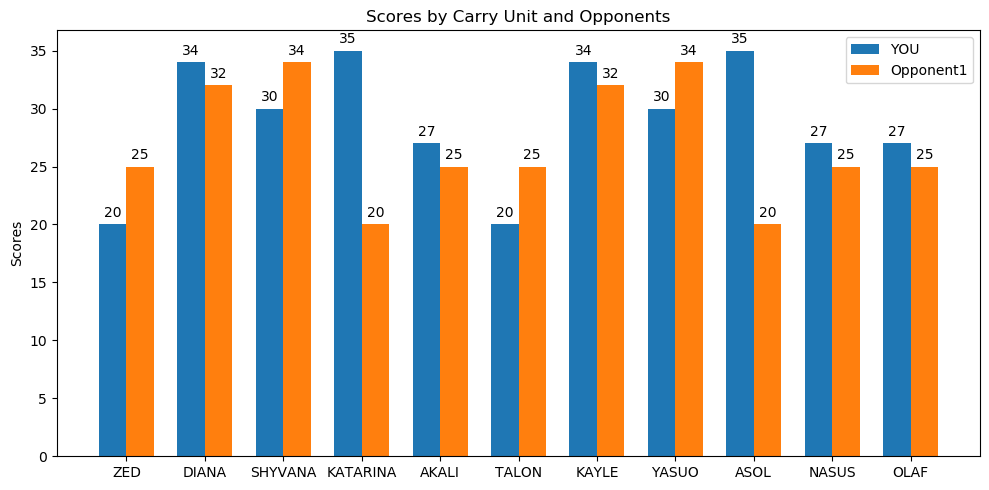

In [132]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


labels =  list(Unit_BIS_Components.keys())
men_means = [20, 34, 30, 35, 27, 20, 34, 30, 35, 27 , 27]
women_means = [25, 32, 34, 20, 25, 25, 32, 34, 20, 25 , 25]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 5))
rects1 = ax.bar(x - width/2, men_means, width, label='YOU')
rects2 = ax.bar(x + width/2, women_means, width, label='Opponent1')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by Carry Unit and Opponents')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()